Run the model on the test set so that the results files are saved.

`./eval_model_script.sh /data/nchand/analysis/BPcm_250/BP203_no_seed_L-1_5 BPcm_250 testing` 

`./eval_model_script.sh /data/nchand/analysis/BPcm_250/BP200_L0_0 BPcm_250 testing`



Use `correlation_boxplot.py` to make the boxplots. Set the experiment names there before running 

In [ ]:
import subprocess
subprocess.run(["python", "correlation_boxplot.py"], check=True)


/homes/gws/nchand/MostafaviLab/bpAITAC/combine_results.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  analysis_df = analysis_df.append(sc_current_df)
/homes/gws/nchand/MostafaviLab/bpAITAC/combine_results.py:237: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trial_df = trial_df.append(trials_current_df)


Selected GPU: 2
DEVICE is cuda:2
['BP200_L0_0', 'BP203_no_seed_L-1_5']
dirs are ['BP200_L0_0', 'BP203_no_seed_L-1_5']
current dir: BP200_L0_0
paths found ['/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-08-2025.15.03/best_model', '/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-08-2025.15.04/best_model', '/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-08-2025.15.05/best_model', '/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-08-2025.22.30/best_model', '/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-09-2025.04.28/best_model'] in /data/nchand/analysis/BPcm_250/BP200_L0_0
REDUCED N TRIAL DATA POINTS TO 5
Analysis file name is testing_analysis.npz
using existing /data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-08-2025.15.03/testing_analysis.npz
using existing /data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-08-2025.15.04/testing_analysis.npz
using existing /data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-08-2025.15.05/testing_analysis.npz
us

CompletedProcess(args=['python', 'correlation_boxplot.py'], returncode=0)

In [67]:
from plotting.combine_results import get_combined_avg
from utils.inference_utils import load_names, load_observed

eval_set = 'test'
peak_names = load_names('/data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/info.txt', eval_set)
results_dir = '/data/nchand/analysis/BPcm_250/'
model_names = 'BP200_L0_0', 'BP203_no_seed_L-1_5'
analysis_filename = 'testing_analysis.npz'
experiment_vars = [0, 0.5]
combined = get_combined_avg(peak_names, model_names, experiment_vars, results_dir, analysis_filename)

file name /data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/test.names.dat
shape (32361,)
found files ['/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-08-2025.15.03/testing_analysis.npz', '/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-08-2025.15.04/testing_analysis.npz', '/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-08-2025.15.05/testing_analysis.npz', '/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-08-2025.22.30/testing_analysis.npz', '/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-09-2025.04.28/testing_analysis.npz', '/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-01-2025.07.59/testing_analysis.npz']
num peaks 32361
num trials 6
[ 0.3468827  -0.03777789  0.01437269  0.88841015  0.08336858]
[ 0.75250071 -0.08917642  0.3308386   1.71157515  0.04682751]
[ 1.09119368 -0.27197301  0.5577826   2.60312897  0.38086779]
[ 1.42456362 -0.12529975  0.66541841  3.42648798  0.66244833]

In [3]:
# Select the desired columns
l0_df = combined[['peak_names', '0']]
# Save to a text file
l0_df.to_csv('/data/nchand/analysis/BPcm_250/BP200_L0_0/scalar_corr.txt', sep=' ', index=False, header=False)

l5_df = combined[['peak_names', '0.5']]
l5_df.to_csv('/data/nchand/analysis/BPcm_250/BP203_no_seed_L-1_5/scalar_corr.txt', sep=' ', index=False, header=False)

To get the outcome scatter plot run the following code in alex's DRG repo under the visualize_performance dir
`python scatter_comparison_plot.py /data/nchand/analysis/BPcm_250/BP200_L0_0/scalar_corr_t10.txt /data/nchand/analysis/BPcm_250/BP203_no_seed_L-1_5/scalar_corr_t10.txt "AI-TAC" "bpAI-TAC" --savefig ~/MostafaviLab/bpAITAC/final_figs/ModelAI-TACvsModelbpAITAC_t1 --plotdiagonal --zeroxaxis --zeroyaxis --contour --density`

To get the outcome scatter plot with selected peaks colored, we get the selected peaks color file from region_identification.ipynb

TODO do this below part with the newly selected peaks

`python scatter_comparison_plot.py /data/nchand/analysis/BPcm_250/BP200_L0_0/scalar_corr_t10.txt /data/nchand/analysis/BPcm_250/BP203_no_seed_L-1_5/scalar_corr_t10.txt "AI-TAC" "bpAI-TAC" --savefig ~/MostafaviLab/bpAITAC/final_figs/3a_scatter_selection --plotdiagonal --zeroxaxis --zeroyaxis --colorfile /data/nchand/analysis/BPcm_250/BP203_200_analysis/testing_lineage_v3/selected_peak_l0_l5_color_file.txt 0 --alpha 0.7`

Getting pearson correlation in the other direction - across the peaks. This means for each celltype will will end up with a pearson correlation.

1. Load model
2. get test data
3. get scalar corr predictions on the test data
4. compute pearson corr across peaks

run `python corr_across_peaks.py` to do this
Then you will get the files used to make the graphs

In [107]:
import numpy as np
# do a boxplot of the correlations
from correlation_boxplot import plot_boxplot
import pandas as pd

outpath = '/data/nchand/analysis/BPcm/BP68_peak_corr'

def convert_to_df(data, y_label, _lambda):
    # Create a dataframe with a column of the data named y_label in the header,
    # and another column that is filled with _lambda values
    df = pd.DataFrame({
        y_label: data,
        'lambda': np.full(len(data), _lambda)
    })
    return df


l0_files = np.load('/data/nchand/analysis/BPcm/BP68_L0_0_extra/peak_corr_testing3_extra.npz')
lp5_files = np.load('/data/nchand/analysis/BPcm/BP68_L-1_5_extra/peak_corr_testing3_extra.npz')
l0_trial_avg_corr = l0_files['trial_avg_corr']
l0_all_corr = l0_files['all_corr']
l0_trial_df = convert_to_df(l0_trial_avg_corr, 'scalar_corr_peaks', 0)
l0_df = convert_to_df(l0_all_corr, 'scalar_corr_peaks', 0)
print(l0_trial_df)

lp5_trial_avg_corr = lp5_files['trial_avg_corr']
lp5_trial_df = convert_to_df(lp5_trial_avg_corr, 'scalar_corr_peaks', 0.5)
lp5_corr_file_x_ocr_x_ocr_x_ocr_x_ocr = lp5_files['all_corr_x_ocr']
lp5_df = convert_to_df(lp5_corr_file, 'scalar_corr_peaks', 0.5)

combined_trial_df = pd.concat([l0_trial_df, lp5_trial_df], axis=0)
combined_df = pd.concat([l0_df, lp5_df], axis=0)
print('combined df len', len(combined_df))
close_to_zero_indices = np.where(np.abs(combined_df['scalar_corr_peaks']) < 0.01)[0]

print("Indices where scalar_corr_peaks are close to 0:")
print(close_to_zero_indices)

# remove outliers from combined_df
combined_df = combined_df[np.abs(combined_df['scalar_corr_peaks']) > 1e-1]


plot_boxplot(data=combined_df, trial_df=combined_trial_df, out_path=outpath, x_label='lambda', y_label='scalar_corr_peaks')

ValueError: Per-column arrays must each be 1-dimensional

In [ ]:
combined_df

,scalar_corr_peaks,lambda
0,0.622144,0.0
1,0.660261,0.0
2,0.654656,0.0
3,0.597303,0.0
4,0.609640,0.0
...,...,...
895,0.606332,0.5
896,0.630280,0.5
897,0.678414,0.5
898,0.681885,0.5


In [ ]:
l0_files.files

['trial_avg_corr', 'all_corr']

# Ablation figures

In [73]:
plt.rc('text', usetex=False)  # Optional: Use LaTeX rendering

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from textwrap import wrap

def create_boxplot(data_dict, title, xlabel, ylabel, figsize=(12, 6), output_file=None, 
                  rotate_xlabel=True, color=None, wrap_length=20, dark_grid=False, fliers=True, xlabel_size=None, plot_area_size=None):
    """
    Create a boxplot from a dictionary of data using seaborn with text wrapping.
    
    :param data_dict: Dictionary with labels as keys and data arrays as values
    :param title: Title of the plot
    :param xlabel: Label for x-axis
    :param ylabel: Label for y-axis
    :param figsize: Size of the figure (width, height)
    :param output_file: If provided, save the plot to this file
    :param rotate_xlabel: Whether to rotate x-axis labels
    :param color: Base color for palette (if None, uses default seaborn palette)
    :param wrap_length: Maximum number of characters per line in x-axis labels
    """
    # Set the style and font scales
    sns.set_style("whitegrid")
    plt.rcdefaults()
    
    if dark_grid:
        sns.set_style("darkgrid")
    
    # Create figure
    print('fig size is', figsize)
    plt.figure(figsize=figsize, constrained_layout=True)
    
    # Convert dictionary to long-format DataFrame
    data_list = []
    for label, values in data_dict.items():
        df = pd.DataFrame({
            'Category': label,
            'Value': values
        })
        data_list.append(df)
    data_df = pd.concat(data_list, ignore_index=True)
    
    # Create color palette if specified
    if color:
        palette = sns.light_palette(color, n_colors=len(data_dict))
    else:
        palette = sns.color_palette("husl",  n_colors=len(data_dict))
    
    # Create boxplot
    ax = sns.boxplot(
        data=data_df,
        x='Category',
        y='Value',
        palette=palette,
        showfliers=fliers,
        # width=0.7,
        # fliersize=5,
        # linewidth=1.5
    )

    # If plot_area_size is specified, adjust the plot area
    if plot_area_size:
        # Check if values are absolute (greater than 1) or proportional
        if plot_area_size[0] > 1 or plot_area_size[1] > 1:
            # Convert absolute sizes (inches) to proportions
            width_prop = plot_area_size[0] / figsize[0]
            height_prop = plot_area_size[1] / figsize[1]
            # Ensure proportions don't exceed 1
            width_prop = min(width_prop, 0.95)
            height_prop = min(height_prop, 0.95)
        # else:
        #     width_prop = plot_area_size[0]
        #     height_prop = plot_area_size[1]
            
        # Calculate margins to justify to right-top
        # Leave 5% margin from right edge
        right_margin = 0.03
        # Calculate left margin by working backwards from right edge
        x_margin = 1 - right_margin - width_prop
        # Position at top with small margin (5% from top)
        y_margin = 0.97 - height_prop
        
        # Set the plot position [left, bottom, width, height]
        ax.set_position([x_margin, y_margin, width_prop, height_prop])




    # Wrap x-axis labels
    labels = list(data_dict.keys())
    wrapped_labels = ['\n'.join(wrap(label, wrap_length)) for label in labels]
    ax.set_xticklabels(wrapped_labels, linespacing=0.8)

    # Calculate appropriate bottom margin based on number of wrapped lines
    max_lines = max(len(label.split('\n')) for label in wrapped_labels)
    # bottom_margin = 0.15 + (max_lines - 1) * 0.05  # Adjust base margin for wrapped text
    
    if rotate_xlabel:
        ax.set_xticklabels(wrapped_labels, rotation=45, ha='right', size=xlabel_size)
    else:
        ax.set_xticklabels(wrapped_labels, ha='center',size=xlabel_size)
    
    # Customize plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Adjust grid opacity and line width
    ax.grid(True, alpha=0.3, linewidth=1)
    
    # Make axis lines thicker
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    
    # Adjust layout with dynamic bottom margin
    # plt.tight_layout()
    
    # Additional margin adjustment if needed
    # plt.subplots_adjust(bottom=bottom_margin)
    
    # Save the plot if output_file is provided
    if output_file:
        plt.savefig(output_file, dpi=330)
        print(f"Boxplot has been saved as '{output_file}'")
    
    plt.show()
    plt.close()

def process_and_plot(path_dict, data_key, title, xlabel, ylabel, figsize=(12, 6), output_file=None, 
                    rotate_xlabel=True, color=None, wrap_length=20, dark_grid=False, fliers=True, xlabel_size=None,  plot_area_size=None):
    """
    Process NPZ files and create a boxplot using seaborn.
    
    :param path_dict: Dictionary with labels as keys and file paths as values
    :param data_key: Key to extract data from NPZ files
    :param title: Title of the plot
    :param xlabel: Label for x-axis
    :param ylabel: Label for y-axis
    :param figsize: Size of the figure (width, height), default is (12, 6)
    :param output_file: If provided, save the plot to this file
    :param rotate_xlabel: Whether to rotate x-axis labels
    :param color: Base color for palette (if None, uses default seaborn palette)
    :param wrap_length: Maximum number of characters per line in x-axis labels
    """
    # Load data for each model
    data_dict = {model: np.load(path)['scalar_corr'] for model, path in path_dict.items()}

    data_dict = {model: np.load(path)[data_key] for model, path in path_dict.items()}
    
    n_boxes = len(data_dict)
    plot_width = 0.5*n_boxes
    plot_height= 2.75
    plot_area_size=(plot_width, plot_height)
    figsize = (plot_width+2, plot_height + 2)

    # Create and display the boxplot
    create_boxplot(data_dict, title, xlabel, ylabel, figsize=figsize, output_file=output_file, 
                  rotate_xlabel=rotate_xlabel, color=color, wrap_length=wrap_length, dark_grid=dark_grid, fliers=fliers, xlabel_size=xlabel_size, plot_area_size=plot_area_size)

Architecture Ablation

fig size is (5.0, 4.75)
Boxplot has been saved as 'final_figs/2d_architecture_boxplot.png'


<Figure size 640x480 with 0 Axes>

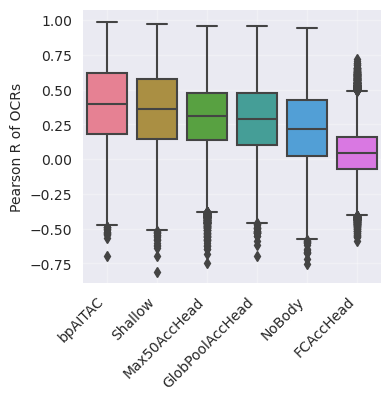

In [69]:
chelan_results_dir='/homes/gws/nchand/MostafaviLab/results/'
ablation_path_dict = {
    'bpAITAC': chelan_results_dir+"BPcm_250/BP203_L-1_5/complete/04-03-2025.09.29/testing_analysis.npz",
    # 'No added bias': "/data/nchand/analysis/BPcm_bias0/BP97_L-1_5/complete/10-22-2024.14.55/testing_analysis.npz",
    'Shallow': chelan_results_dir+ "BPcm_skinny/BP205_L-1_5/complete/04-06-2025.07.44/testing_correlation_analysis.npz",
    'Max50AccHead': chelan_results_dir+"BPmp/BP207_L-1_5/complete/04-07-2025.14.14/testing_correlation_analysis.npz",
    'GlobPoolAccHead': chelan_results_dir+"BPnetRep/BP206_L-1_5/complete/04-06-2025.07.48/testing_correlation_analysis.npz",
    'NoBody': chelan_results_dir+"BPcm_super_skinny/BP208_L-1_5/complete/04-07-2025.13.48/testing_correlation_analysis.npz",
    'FCAccHead': chelan_results_dir+"BPol/BP209_L-1_5/complete/04-07-2025.13.51/testing_correlation_analysis.npz"
}

plt.clf()

process_and_plot(
    ablation_path_dict,
    'scalar_corr',
    '',
    '',
    'Pearson R of OCRs',
    output_file='final_figs/2d_architecture_boxplot.png',
    dark_grid=True,
    fliers=True,
)

In [ ]:
# TODO ablation for pearson and in other direction

## Bias ablation

fig size is (4.0, 4.75)
Boxplot has been saved as 'final_figs/2e_bias_scalar_correlation_boxplot.png'


<Figure size 640x480 with 0 Axes>

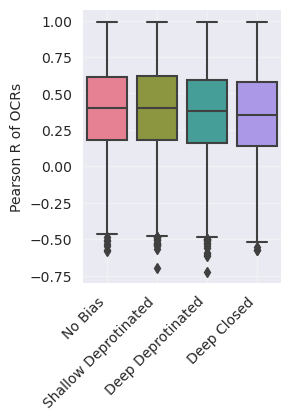

fig size is (4.0, 4.75)
Boxplot has been saved as 'final_figs/S3a_bias_corr_x_ocrs_boxplot.png'


<Figure size 640x480 with 0 Axes>

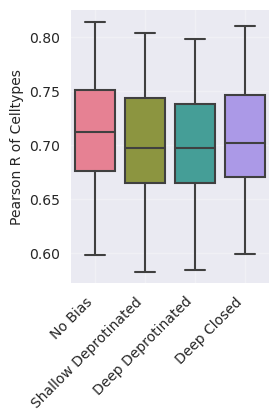

In [123]:
# ablation_path_dict = {
#     'No additional bias information added': "/homes/gws/nchand/MostafaviLab/results/BPcm_bias0/BP127_L-1_5/complete/12-26-2024.18.38/testing_analysis.npz",
#     'Shallow bias model trained on deprotinated DNA': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP126_L-1_5/complete/11-17-2024.11.51/testing_analysis.npz",
#     'Deep bias model trained on deprotinated DNA': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP132_L-1_5/complete/12-23-2024.11.20/testing_analysis.npz",
#     'Deep bias model trained on closed chromatin regions': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP133_L-1_5/complete/12-26-2024.13.12/testing_analysis.npz",
# }    
ablation_path_dict = {
    'No Bias': "/data/nchand/analysis/BPcm_bias0/BP212_L-1_5/complete/04-08-2025.15.03/testing_correlation_analysis.npz",
    'Shallow Deprotinated': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP203_L-1_5/complete/04-03-2025.09.29/testing_correlation_analysis.npz",
    'Deep Deprotinated': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP210_L-1_5/complete/04-08-2025.08.57/testing_correlation_analysis.npz",
    'Deep Closed': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP211_L-1_5/complete/04-08-2025.09.04/testing_correlation_analysis.npz",
}    

plt.clf()

process_and_plot(
    ablation_path_dict,
    'scalar_corr',
    '',
    '',
    'Pearson R of OCRs',
    output_file='final_figs/2e_bias_scalar_correlation_boxplot.png',
    dark_grid=True,
)
  

plt.clf()

process_and_plot(
    ablation_path_dict,
    'scalar_pearson_corr_across_ocrs',
    '',
    '',
    'Pearson R of Celltypes',
    output_file='final_figs/S3a_bias_corr_x_ocrs_boxplot.png',
    dark_grid=True,
    fliers=False
)

Loss function ablation

fig size is (4.0, 4.75)
Boxplot has been saved as 'final_figs/2a_loss_function_boxplot.png'


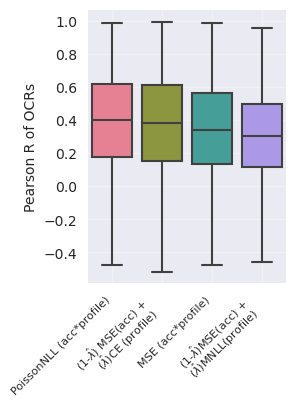

fig size is (4.0, 4.75)
Boxplot has been saved as 'final_figs/S2a_loss_function_pearson_x_ocr.png'


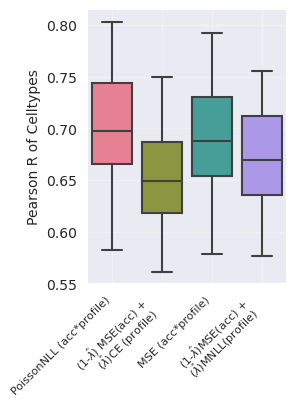

In [111]:
loss_path_dict = {
    'PoissonNLL (acc*profile)': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP203_L-1_5/complete/04-03-2025.09.29/testing_analysis.npz",
    '(1-$\hat{\lambda}$) MSE(acc) + ($\hat{\lambda}$)CE (profile)': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP200_L-1_5/complete/04-01-2025.08.22/testing_analysis.npz",
    'MSE (acc*profile)': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP202_L-1_5/complete/04-03-2025.09.23/testing_analysis.npz",
    '(1-$\hat{\lambda}$)MSE(acc) + ($\hat{\lambda}$)MNLL(profile)': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP201_L-1_5/complete/04-03-2025.09.19/testing_analysis.npz",
}


process_and_plot(
    loss_path_dict,
    'scalar_corr',
    '',
    '',
    ylabel='Pearson R of OCRs',
    output_file='final_figs/2a_loss_function_boxplot.png',
    wrap_length=35,
    dark_grid=True,
    xlabel_size=8,
    fliers=False
)

# SUPPLEMENTARY corr across OCRs

sup_loss_path_dict = {
    'PoissonNLL (acc*profile)': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP203_L-1_5/complete/04-03-2025.09.29/testing_correlation_analysis.npz",
    '(1-$\hat{\lambda}$) MSE(acc) + ($\hat{\lambda}$)CE (profile)': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP200_L-1_5/complete/04-01-2025.08.22/testing_correlation_analysis.npz",
    'MSE (acc*profile)': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP202_L-1_5/complete/04-03-2025.09.23/testing_correlation_analysis.npz",
    '(1-$\hat{\lambda}$)MSE(acc) + ($\hat{\lambda}$)MNLL(profile)': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP201_L-1_5/complete/04-03-2025.09.19/testing_correlation_analysis.npz",
}
process_and_plot(
    sup_loss_path_dict,
    'scalar_pearson_corr_across_ocrs',
    '',
    '',
    ylabel='Pearson R of Celltypes',
    output_file='final_figs/S2a_loss_function_pearson_x_ocr.png',
    wrap_length=35,
    dark_grid=True,
    xlabel_size=8,
    fliers=False
)


## Binning study

fig size is (4.0, 4.75)
Boxplot has been saved as 'final_figs/2f_bin_boxplot.png'


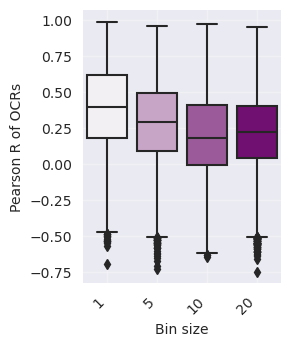

fig size is (4.0, 4.75)
Boxplot has been saved as 'final_figs/S3b_bin_boxplot.png'


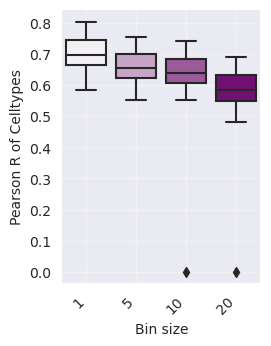

In [130]:
bin_path_dict = {
    '1': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP203_L-1_5/complete/04-03-2025.09.29/testing_correlation_analysis.npz",
    '5': "/data/nchand/analysis/BPcm_250/BP213_L-1_5/complete/04-09-2025.03.16/testing_correlation_analysis.npz",
    '10': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP214_L-1_5/complete/04-10-2025.14.56/testing_correlation_analysis.npz",
    '20': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP215_L-1_5/complete/04-11-2025.08.30/testing_correlation_analysis.npz",
}


process_and_plot(
    bin_path_dict,
    'scalar_corr',
    '',
    'Bin size',
    'Pearson R of OCRs',
    output_file='final_figs/2f_bin_boxplot.png',
    color='purple',
    dark_grid=True,
)

process_and_plot(
    bin_path_dict,
    'scalar_pearson_corr_across_ocrs',
    '',
    'Bin size',
    'Pearson R of Celltypes',
    output_file='final_figs/S3b_bin_boxplot.png',
    color='purple',
    dark_grid=True,
)




# Lambda ablation

For the lambda ablation
`./eval_model_script.sh /data/nchand/analysis/BPcm_250/BP200 BPcm_250 testing 1 998 90 best_loss_model.pth` for the best profile models
`./eval_model_script.sh /data/nchand/analysis/BPcm_250/BP203 BPcm_250 testing 1 998 90 best_loss_model.pth`

`./eval_model_script.sh /data/nchand/analysis/BPcm_250/BP200 BPcm_250 testing 1 998 90` for the best scalar prediction models


`./eval_model_get_corr_script.sh /data/nchand/analysis/BPcm_250/BP200 BPcm_250 testing 1 998 90` for correlation in the other direction



file name /data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/test.total_counts.dat
file name /data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/test.bp_counts.dat
(32361, 90)
(32361,)
2658


fig size is (7.0, 4.75)
Boxplot has been saved as 'final_figs/2c_boxplot.png'


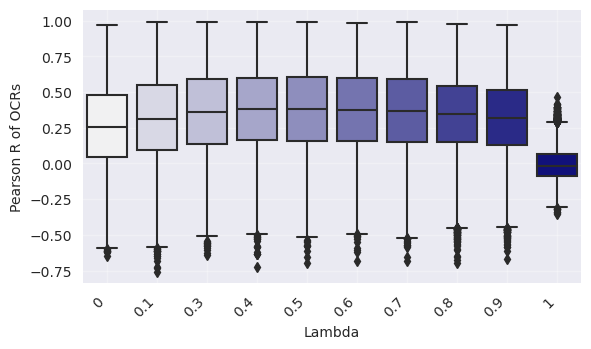

fig size is (7.0, 4.75)
Boxplot has been saved as 'final_figs/S2c_boxplot.png'


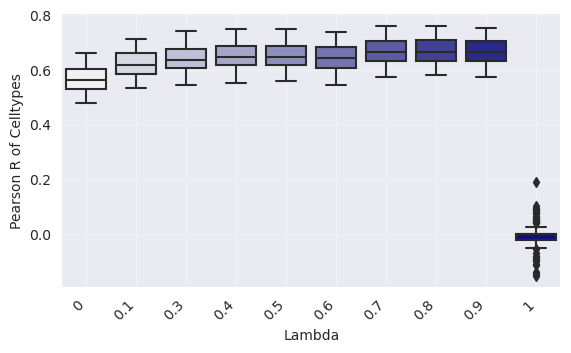

In [ ]:
file_name='testing_correlation_analysis.npz' # this is the best_loss_model path one right now
# file_name = 'testing_correlation_analysis.npz_best_loss_model.pth.npz'
lambda_scalar_corr_path_dict = {
    '0': "/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-01-2025.07.59/"+file_name,
    '0.1': "/data/nchand/analysis/BPcm_250/BP200_L-1_1/complete/04-04-2025.13.53/"+file_name,
    '0.3': "/data/nchand/analysis/BPcm_250/BP200_L-1_3/complete/04-04-2025.07.38/"+file_name,
    '0.4': "/data/nchand/analysis/BPcm_250/BP200_L-1_4/complete/04-01-2025.08.00/"+file_name,
    '0.5': "/data/nchand/analysis/BPcm_250/BP200_L-1_5/complete/04-01-2025.08.22/"+file_name,
    '0.6': "/data/nchand/analysis/BPcm_250/BP200_L-1_6/complete/04-02-2025.05.24/"+file_name,
    '0.7': "/data/nchand/analysis/BPcm_250/BP200_L-1_7/complete/04-02-2025.05.26/"+file_name,
    '0.8': "/data/nchand/analysis/BPcm_250/BP200_L-1_8/complete/04-05-2025.00.08/"+file_name,
    '0.9': "/data/nchand/analysis/BPcm_250/BP200_L-1_9/complete/04-04-2025.22.48/"+file_name,
    '1': "/data/nchand/analysis/BPcm_250/BP200_L0_1/complete/04-04-2025.07.42/"+file_name,
}

process_and_plot(
    lambda_scalar_corr_path_dict,
    'scalar_corr',
    '',
    'Lambda',
    'Pearson R of OCRs',
    output_file='final_figs/2c_boxplot.png',
    color='darkblue',
    dark_grid=True,
)

# CORRELATION in the other direction
process_and_plot(
    lambda_scalar_corr_path_dict,
    'scalar_pearson_corr_across_ocrs',
    '',
    'Lambda',
    'Pearson R of Celltypes',
    output_file='final_figs/S2c_boxplot.png',
    color='darkblue',
    dark_grid=True,
)





fig size is (7.5, 4.75)
Boxplot has been saved as 'final_figs/S2d_boxplot.png'


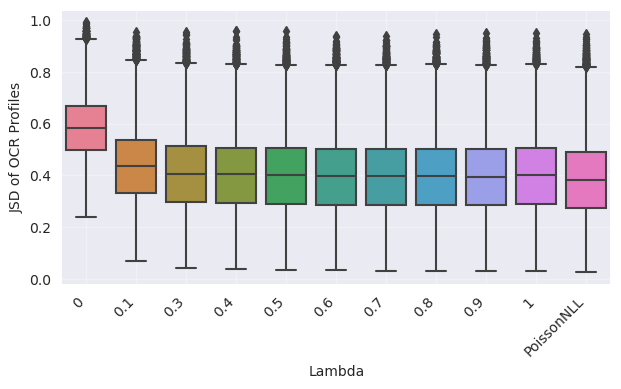

fig size is (7.5, 4.75)
Boxplot has been saved as 'final_figs/2e_boxplot.png'


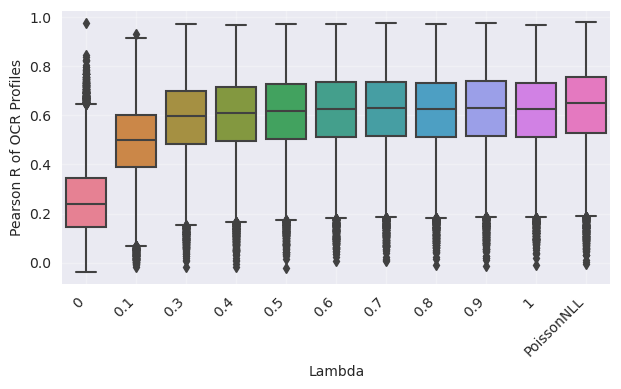

In [147]:
# PROFILE METRICS

file_name='save_file_name=testing_analysis.npz_best_loss_model.pth.npz' # this is the best_loss_model path one right now
# file_name = 'testing_correlation_analysis.npz_best_loss_model.pth.npz'
profile_lambda_path_dict = {
    '0': "/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-01-2025.07.59/"+file_name,
    '0.1': "/data/nchand/analysis/BPcm_250/BP200_L-1_1/complete/04-04-2025.13.53/"+file_name,
    '0.3': "/data/nchand/analysis/BPcm_250/BP200_L-1_3/complete/04-04-2025.07.38/"+file_name,
    '0.4': "/data/nchand/analysis/BPcm_250/BP200_L-1_4/complete/04-01-2025.08.00/"+file_name,
    '0.5': "/data/nchand/analysis/BPcm_250/BP200_L-1_5/complete/04-01-2025.08.22/"+file_name,
    '0.6': "/data/nchand/analysis/BPcm_250/BP200_L-1_6/complete/04-02-2025.05.24/"+file_name,
    '0.7': "/data/nchand/analysis/BPcm_250/BP200_L-1_7/complete/04-02-2025.05.26/"+file_name,
    '0.8': "/data/nchand/analysis/BPcm_250/BP200_L-1_8/complete/04-05-2025.00.08/"+file_name,
    '0.9': "/data/nchand/analysis/BPcm_250/BP200_L-1_9/complete/04-04-2025.22.48/"+file_name,
    '1': "/data/nchand/analysis/BPcm_250/BP200_L0_1/complete/04-04-2025.07.42/"+file_name,
    'PoissonNLL': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP203_L-1_5/complete/04-03-2025.09.29/save_file_name=testing_analysis.npz_best_loss_model.pth.npz"
}
process_and_plot(
    bin_path_dict,
    'top_ocr_jsd',
    '',
    'Lambda',
    'JSD of OCR Profiles',
    output_file='final_figs/S2d_boxplot.png',
    dark_grid=True,
)

process_and_plot(
    bin_path_dict,
    'top_ocr_profile_corr',
    '',
    'Lambda',
    'Pearson R of OCR Profiles',
    output_file='final_figs/2e_boxplot.png',
    dark_grid=True,
)

In [154]:
from utils.inference_utils import load_observed
from utils.inference_utils import load_names
import numpy as np
thresholds = [300, 400, 500]

info_file = '/data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/info.txt'
test_counts = load_observed(info_file, dataset_type='test', data_name='total_counts')
test_bpcounts = load_observed(info_file, dataset_type='test', data_name='bp_counts')
test_bias = load_observed(info_file, dataset_type='test', data_name='bias')
test_onehot = load_observed(info_file, dataset_type='test', data_name='onehot')

print(test_counts.shape)


for name, file in profile_lambda_path_dict.items():
    
    # Load the existing NPZ file
    loaded_data = np.load(file)

    # Create a dictionary with all the existing arrays
    # This converts the NpzFile object to a regular dictionary
    data_dict = {key: loaded_data[key] for key in loaded_data.files}


    # make a mask for where test_counts > threshold
    for th in thresholds:   
        count_mask = np.max(test_counts, axis=1) > th # the max of all celltypes
        print(count_mask.shape)
        print(np.sum(count_mask))
    
        # Calculate avg_profile_corr
        profile_corr = loaded_data['profile_corr']
        avg_profile_corr = np.mean(profile_corr, axis=-1)
        top_ocr_profile_corr_masked = loaded_data['top_ocr_profile_corr'][count_mask]
        top_ocr_jsd_masked = loaded_data['top_ocr_jsd'][count_mask]

        
        # Add your new array to the dictionary
        data_dict[f'top_ocr_profile_corr_masked_{th}'] = top_ocr_profile_corr_masked
        data_dict[f'top_ocr_jsd_masked_{th}'] = top_ocr_jsd_masked
        

    # If you prefer to create a new file instead:
    new_file = file.replace('.npz', '_profile_modified.npz')
    print(new_file)
    np.savez(new_file, **data_dict)

file name /data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/test.total_counts.dat
file name /data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/test.bp_counts.dat
file name /data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/test.bias.dat
file name /data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/test.onehot.dat
(32361, 90)
(32361,)
4618
(32361,)
2658
(32361,)
1567
/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-01-2025.07.59/save_file_name=testing_analysis_profile_modified.npz_best_loss_model.pth_profile_modified.npz
(32361,)
4618
(32361,)
2658
(32361,)
1567
/data/nchand/analysis/BPcm_250/BP200_L-1_1/complete/04-04-2025.13.53/save_file_name=testing_analysis_profile_modified.npz_best_loss_model.pth_profile_modif

fig size is (7.5, 4.75)
Boxplot has been saved as 'final_figs/S2d_300_boxplot.png'


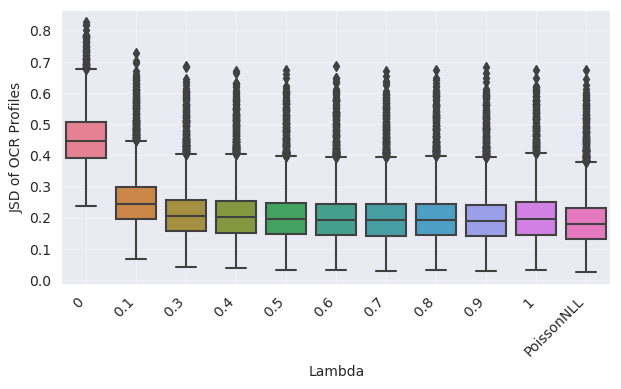

fig size is (7.5, 4.75)
Boxplot has been saved as 'final_figs/2e_300_boxplot.png'


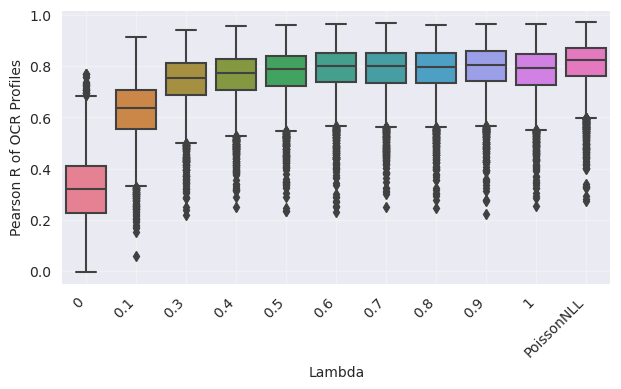

fig size is (7.5, 4.75)
Boxplot has been saved as 'final_figs/S2d_400_boxplot.png'


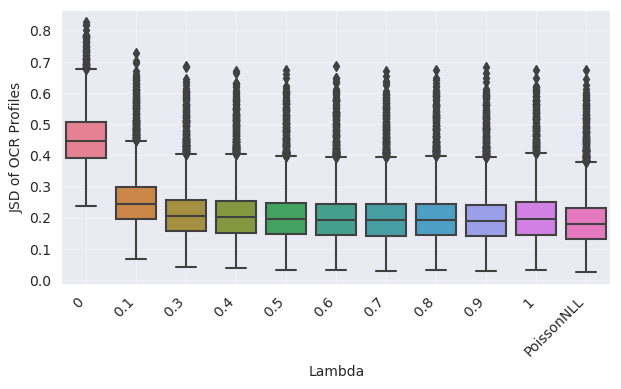

fig size is (7.5, 4.75)
Boxplot has been saved as 'final_figs/2e_400_boxplot.png'


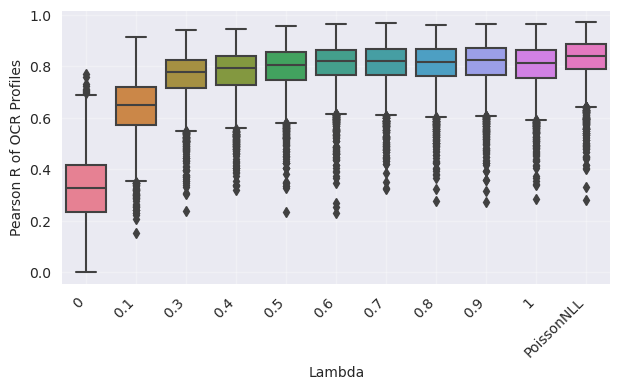

fig size is (7.5, 4.75)
Boxplot has been saved as 'final_figs/S2d_500_boxplot.png'


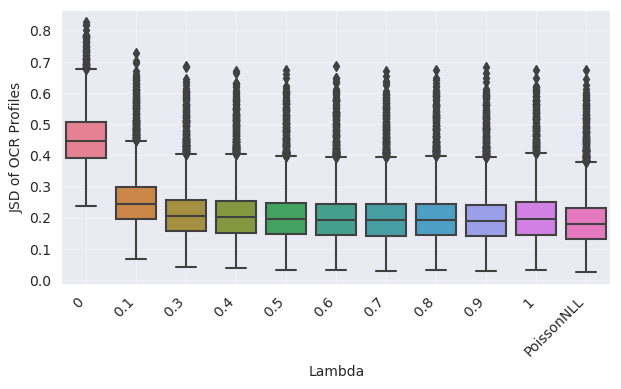

fig size is (7.5, 4.75)
Boxplot has been saved as 'final_figs/2e_500_boxplot.png'


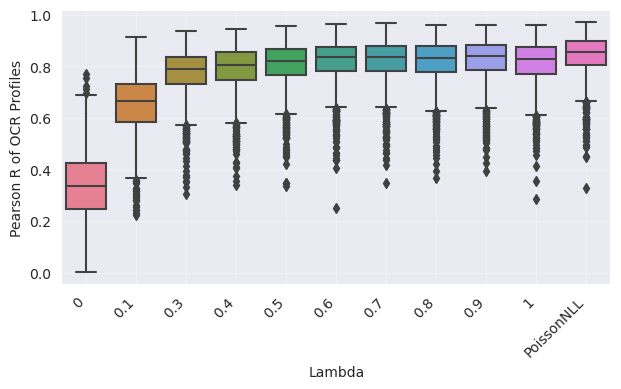

In [173]:
file_name='save_file_name=testing_analysis_profile_modified.npz_best_loss_model.pth_profile_modified.npz' # this is the best_loss_model path one right now
# file_name = 'testing_correlation_analysis.npz_best_loss_model.pth.npz'
profile_th_lambda_path_dict = {
    '0': "/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-01-2025.07.59/save_file_name=testing_analysis_profile_modified.npz_best_loss_model.pth_profile_modified.npz",
    '0.1': "/data/nchand/analysis/BPcm_250/BP200_L-1_1/complete/04-04-2025.13.53/"+file_name,
    '0.3': "/data/nchand/analysis/BPcm_250/BP200_L-1_3/complete/04-04-2025.07.38/"+file_name,
    '0.4': "/data/nchand/analysis/BPcm_250/BP200_L-1_4/complete/04-01-2025.08.00/"+file_name,
    '0.5': "/data/nchand/analysis/BPcm_250/BP200_L-1_5/complete/04-01-2025.08.22/"+file_name,
    '0.6': "/data/nchand/analysis/BPcm_250/BP200_L-1_6/complete/04-02-2025.05.24/"+file_name,
    '0.7': "/data/nchand/analysis/BPcm_250/BP200_L-1_7/complete/04-02-2025.05.26/"+file_name,
    '0.8': "/data/nchand/analysis/BPcm_250/BP200_L-1_8/complete/04-05-2025.00.08/"+file_name,
    '0.9': "/data/nchand/analysis/BPcm_250/BP200_L-1_9/complete/04-04-2025.22.48/"+file_name,
    '1': "/data/nchand/analysis/BPcm_250/BP200_L0_1/complete/04-04-2025.07.42/"+file_name,
    'PoissonNLL': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP203_L-1_5/complete/04-03-2025.09.29/save_file_name=testing_analysis_profile_modified.npz_best_loss_model.pth_profile_modified.npz"
}

for th in thresholds:
    process_and_plot(
        profile_th_lambda_path_dict,
        'top_ocr_jsd_masked_300',
        '',
        'Lambda',
        'JSD of OCR Profiles',
        output_file=f'final_figs/S2d_{th}_boxplot.png',
        dark_grid=True,
    )

    process_and_plot(
        profile_th_lambda_path_dict,
        f'top_ocr_profile_corr_masked_{th}',
        '',
        'Lambda',
        'Pearson R of OCR Profiles',
        output_file=f'final_figs/2e_{th}_boxplot.png',
        dark_grid=True,
    )



In [159]:
f=np.load("/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-01-2025.07.59/"+file_name)
f.files

['scalar_corr',
 'profile_corr',
 'jsd',
 'ocr_profile_corr',
 'ocr_jsd',
 'top_ocr_profile_corr',
 'top_ocr_jsd',
 'top_ocr_profile_corr_masked_300',
 'top_ocr_jsd_masked_300',
 'top_ocr_profile_corr_masked_400',
 'top_ocr_jsd_masked_400',
 'top_ocr_profile_corr_masked_500',
 'top_ocr_jsd_masked_500']

In [103]:
f=np.load("/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP230_L-1_3/complete/04-24-2025.07.48/"+file_name)
f.files

['scalar_corr',
 'profile_corr',
 'jsd',
 'ocr_profile_corr',
 'ocr_jsd',
 'top_ocr_profile_corr',
 'top_ocr_jsd']

# Coefficient of variation vs performance

Specifically we want the variation in real total count value across celltypes 

In [ ]:
from utils.inference_utils import load_observed
from plot_utils import plot_corr_variance
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr



# Load the total count data for test set
# calculate the coefficient of variance for each region
# plot that against the pearson correlation 'scalar_corr' from the analysis_testing.npz file

def coefficient_of_variation(data):
    # Calculate standard deviation along axis 1
    std_dev = np.std(data, axis=1)
    
    # Calculate mean along axis 1
    mean = np.mean(data, axis=1)
    
    # Calculate coefficient of variation
    cv = (std_dev / mean)
    return cv
    
    return cv
def get_coefficient_of_variance(info_file):
    total_counts = load_observed(info_file, dataset_type='test', data_name='total_counts')
    cv = coefficient_of_variation(total_counts)
    return cv

def create_density_scatter_plot(x, y, title, x_label="X", y_label="Y", colormap='viridis'):
    """
    Create a density scatter plot.
    
    Parameters:
    x (array-like): x-coordinates of points
    y (array-like): y-coordinates of points
    title (str): Title of the plot
    x_label (str): Label for x-axis
    y_label (str): Label for y-axis
    colormap (str): Matplotlib colormap to use
    
    Returns:
    matplotlib.figure.Figure: The created figure
    """
    # Calculate the point density
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    # Sort the points by density, so that the densest points are plotted last
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    scatter = ax.scatter(x, y, c=z, s=50, alpha=0.5, cmap=colormap)

    # Add a color bar
    plt.colorbar(scatter, label='Density')

    # Set labels and title
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

     # Add Pearson correlation coefficient as text
    corr, _ = pearsonr(x, y)
    ax.text(0.05, 0.95, f'Pearson r = {corr:.2f}', transform=ax.transAxes,
            verticalalignment='top', fontsize=10,
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

    return fig

def plot_cv_density(variation, correlation, log_scale=False):
    fig = create_density_scatter_plot(variation, correlation, title='', x_label='Coefficient of variation of Tn5 counts across celltypes', y_label='Pearson R of OCRs across celltypes')
    plt.show()
    plt.savefig('test_cv.png')

run_type = 'complete'
if run_type == 'sample': 
    info_file='/data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/sample_random5000_allcell_bias_corrected_normalized_5.28.23/memmap/info.txt'
else:
    info_file='/data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_bias_corrected_normalized_3.7.23/memmap/info.txt'

cv = get_coefficient_of_variance(info_file)

lp5_analysis_file = '/data/nchand/analysis/BPcm/BP68_L-1_5/complete/06-10-2024.00.46/testing_analysis.npz'
lp5_scalar_corr = np.load(analysis_file)['scalar_corr']
lp9_scalar_corr 
# plot_cv(cv, scalar_corr)
plot_cv_density(cv, scalar_corr, log_scale=True)
# plot_corr_variance(total_counts, scalar_corr, 'test')

plt.close('all') 



ModuleNotFoundError: No module named 'yaml'

In [10]:
q1, q2, q3 = np.percentile(cv, [25, 50, 75])
print(q1, q2, q3)

# Create an array of the same length as cv, initialized with zeros
quartile_array = np.zeros_like(cv, dtype=int)

# Assign quartile numbers
quartile_array[cv < q1] = 1
quartile_array[(cv >= q1) & (cv < q2)] = 2
quartile_array[(cv >= q2) & (cv < q3)] = 3
quartile_array[cv >= q3] = 4

# Verify the results
print(f"Shape of quartile_array: {quartile_array.shape}")
print(f"Unique values in quartile_array: {np.unique(quartile_array)}")
print(f"Count of each quartile:")
for i in range(1, 5):
    print(f"Quartile {i}: {np.sum(quartile_array == i)}")

# Print the first few elements of the array as an example
print("\nFirst 20 elements of quartile_array:")
print(quartile_array[:20])

# create a dataframe that has the correlations, the lambda values, and the quartile array

# make boxplot of scalar_corr, with the x axis of the squartile_array, and color the plot by the 'lambda' values 


0.908150315284729 1.2449816465377808 1.6854608058929443
Shape of quartile_array: (32361,)
Unique values in quartile_array: [1 2 3 4]
Count of each quartile:
Quartile 1: 8090
Quartile 2: 8089
Quartile 3: 8091
Quartile 4: 8091

First 20 elements of quartile_array:
[1 1 4 4 1 1 3 4 3 4 2 4 4 4 4 4 4 2 4 3]


In [8]:
scalar_corr.shape

(32361,)

## Multi / Single Track ablation

fig size is (3.5, 4.75)
Boxplot has been saved as 'final_figs/2b_track_corr_x_lineage'


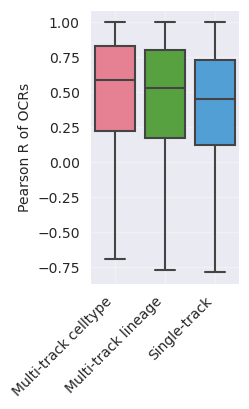

fig size is (3.5, 4.75)
Boxplot has been saved as 'final_figs/S2b_track_corr_x_ocr'


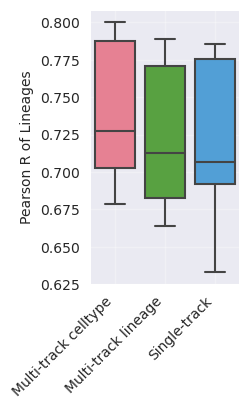

In [128]:
track_path_dict = {
    'Multi-track celltype': '/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP203_L-1_5/complete/04-03-2025.09.29/lineage_track_averaged_testset_corr_best_loss.npz',
    #'Multi-track celltype': '/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP203_L-1_5/complete/04-03-2025.09.29/lineage_track_averaged_testset_corr.npz',
    # 'Multi-track lineage': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP216_L-1_5/complete/04-11-2025.08.31/testset_corr.npz",
    'Multi-track lineage': "/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP216_L-1_5/complete/04-11-2025.08.31/testset_corr_best_loss_model.npz",
    'Single-track': '/homes/gws/nchand/MostafaviLab/results/BPcm_250/BPcm_250_217-225_single_track_combined_testset_corr.npz'
}   

process_and_plot(
    track_path_dict,
    'pearson_corr_cross_celltype',
    '',
    '',
    'Pearson R of OCRs',
    output_file='final_figs/2b_track_corr_x_lineage',
    dark_grid=True,
    fliers=False
)

process_and_plot(
    track_path_dict,
    'pearson_corr_cross_ocr',
    '',
    '',
    'Pearson R of Lineages',
    output_file='final_figs/S2b_track_corr_x_ocr',
    dark_grid=True
)



# Figure 1
a. example profiles and total counts matrix

For figure 1a make example distributions

(100, 90, 1000)
37
tc 1 3320.0
tc 2 1092.0
max y  122.0


<Figure size 640x480 with 0 Axes>

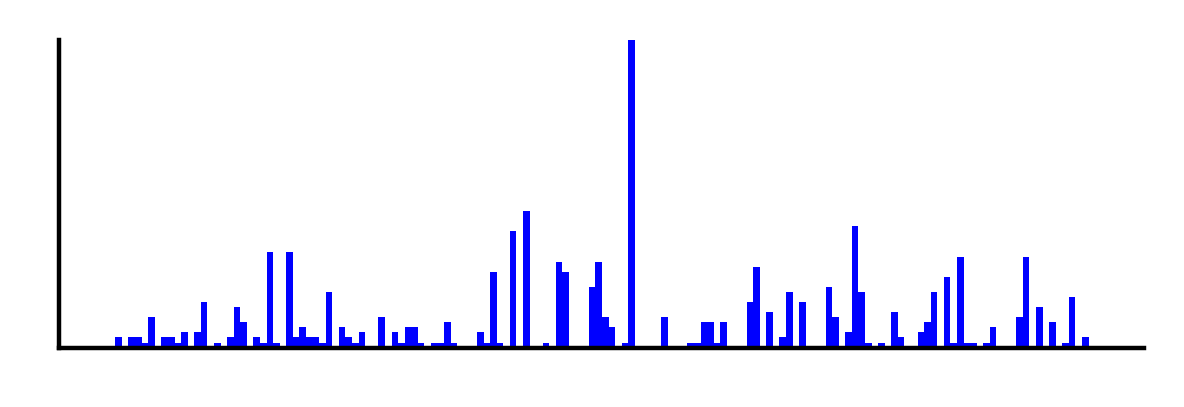

<Figure size 640x480 with 0 Axes>

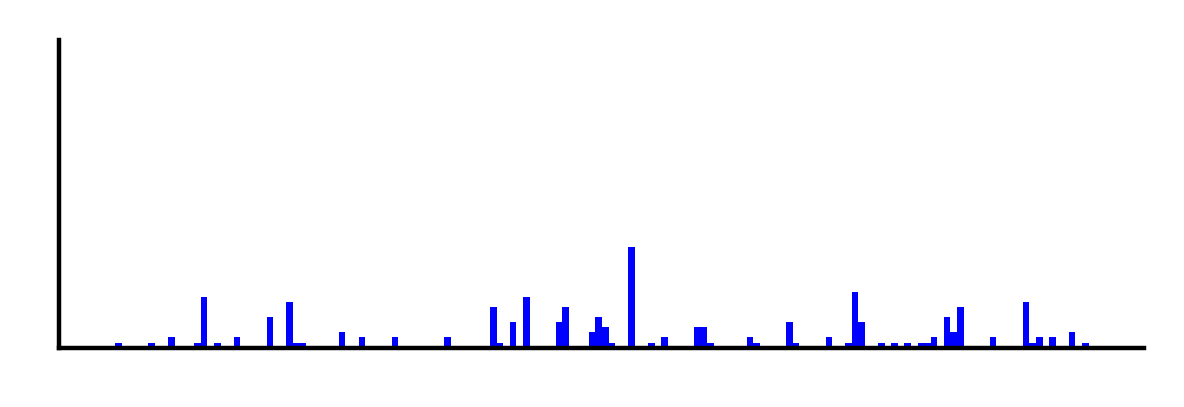

In [23]:
profile_path = '/data/nchand/ImmGen/mouse/BPprofiles1000/sample_profile.counts.npy'
total_counts_path = '/data/nchand/ImmGen/mouse/BPprofiles1000/sample_profile.summed_counts.npy'
profile = np.load(profile_path).astype(np.float32)
total_counts= np.load(total_counts_path).astype(np.float32)
print(profile.shape)

def plot_profile(obs_prof, ymax=None, save_file=None):
    """
    obs_prof and pred_prof are expected
    to be np arrays with a single dimension
    """
    plt.clf()
    fig = plt.figure(figsize = (3.5, 1), dpi = 400)
    ax = fig.add_subplot()
    x_axis = np.arange(np.shape(obs_prof)[-1])
    ax.bar(x_axis, obs_prof, alpha = 1, color = 'blue', width=1, linewidth=0, align='center')

    # Set the y-axis limit if specified
    if ymax is not None:
        ax.set_ylim(0, ymax)

    # fig.savefig(out_path)
    ax.set_facecolor('white')  # White background
    fig.patch.set_facecolor('white')  # White figure background
    ax.spines['top'].set_visible(False)  # Remove top border
    ax.spines['right'].set_visible(False)  # Remove right border
    ax.spines['bottom'].set_visible(True)  # Remove top border
    ax.spines['left'].set_visible(True)  # Remove top border

    # Remove all axis ticks and labels
    ax.set_xticks([])
    ax.set_yticks([])
    
    if save_file is not None:
        plt.savefig(save_file, dpi=500, transparent=True)
    plt.show()


idx = 10
celltype = 0
max_celltype = np.argmax(np.sum(profile[idx, :, :], axis=-1))
print(max_celltype)
# plot_profile(profile[idx, max_celltype, :])


cell_idx_1 = 37
cell_idx_2 = 36
tc_1 = total_counts[idx, cell_idx_1]
tc_2 = total_counts[idx, cell_idx_2]
print('tc 1', tc_1)
print('tc 2', tc_2)
# Calculate profiles
profile_1 = profile[10, cell_idx_1, 675:825] 
profile_2 = profile[10, cell_idx_2, 675:825] 
# profile_1 = profile[10, cell_idx_1, 700:800] 
# profile_2 = profile[10, cell_idx_2, 700:800] 

max_y = max(np.max(profile_1), np.max(profile_2)) 
print('max y ', max_y)

# Plot both profiles with the same y-axis maximum
plot_profile(profile_1, ymax=max_y, save_file=f'final_figs/profile_ex_cell{cell_idx_1}_{idx}_150')
plot_profile(profile_2, ymax=max_y, save_file=f'final_figs/profile_ex_cell{cell_idx_2}_{idx}_150')


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import OrderedDict

def plot_clustered_heatmap(data_matrix, cell_types, lineage_indices, 
                          figsize=(12, 8), cmap="YlOrRd", 
                          lineage_colors=None, 
                          row_cluster=True):
    """
    Create a clustered heatmap with colored annotations for cell lineages.
    
    Parameters:
    -----------
    data_matrix : numpy.ndarray
        2D numpy array containing the data to be plotted
    cell_types : list
        List of cell type names corresponding to columns in data_matrix
    lineage_indices : dict
        Dictionary mapping lineage names to lists of column indices
        e.g., {'Myeloid': [0,1,2], 'Lymphoid': [3,4,5]}
    figsize : tuple, optional
        Figure size in inches (width, height)
    cmap : str, optional
        Colormap for the heatmap
    lineage_colors : dict, optional
        Dictionary mapping lineages to colors. If None, colors will be automatically assigned
    row_cluster : bool, optional
        Whether to cluster rows
    """
    # Create lineage color mapping if not provided
    if lineage_colors is None:
        colors = sns.color_palette(n_colors=len(lineage_indices))
        lineage_colors = dict(zip(lineage_indices.keys(), colors))
    
    # Create a new ordering for columns based on lineage groupings
    new_order = []
    cell_type_to_lineage = {}
    
    # First create the mapping for all cell types to their lineages
    for lineage, indices in lineage_indices.items():
        for idx in indices:
            cell_type_to_lineage[cell_types[idx]] = lineage
    
    # Add indices in order of lineages, ensuring complete grouping
    for lineage in lineage_indices.keys():
        new_order.extend(sorted(lineage_indices[lineage]))
        
    # Force complete grouping by disabling column clustering
    col_cluster = False
    
    # Reorder the data matrix and cell types
    reordered_data = data_matrix[:, new_order]
    reordered_cell_types = [cell_types[i] for i in new_order]
    
    # Convert data to DataFrame with reordered columns
    df = pd.DataFrame(reordered_data, columns=reordered_cell_types)
    
    # Create column colors based on the new order
    col_colors = pd.Series(
        [lineage_colors[cell_type_to_lineage[ct]] for ct in reordered_cell_types],
        index=reordered_cell_types
    )
    
    # Create the clustered heatmap
    g = sns.clustermap(
        df,
        figsize=figsize,
        cmap=cmap,
        col_colors=col_colors,
        row_cluster=row_cluster,
        col_cluster=col_cluster,
        yticklabels=False,  # Remove row labels
        xticklabels=False,  # Remove column labels
        dendrogram_ratio=(0, 0),  # Remove dendrograms
        cbar_pos=None,  # Remove the color gradient bar
        tree_kws={'linewidths': 0}  # Hide dendrogram lines
    )
    
    # Remove all ticks
    g.ax_heatmap.set_xticks([])
    g.ax_heatmap.set_yticks([])
    
    # Add lineage labels above the color bars
    if hasattr(g, 'ax_col_colors'):
        # Create a mapping of cell type positions
        positions = {ct: i for i, ct in enumerate(reordered_cell_types)}
        
        # Track the ranges for each lineage in the reordered data
        lineage_ranges = {}
        current_lineage = None
        start_idx = 0
        
        for i, ct in enumerate(reordered_cell_types):
            lineage = cell_type_to_lineage[ct]
            if current_lineage != lineage:
                if current_lineage is not None:
                    lineage_ranges[current_lineage] = (start_idx, i)
                current_lineage = lineage
                start_idx = i
        # Don't forget the last group
        lineage_ranges[current_lineage] = (start_idx, len(reordered_cell_types))
        
        # Add the labels at the middle of each lineage's range
        for lineage, (start, end) in lineage_ranges.items():
            # Calculate the exact middle of the section
            middle = start + (end - start) / 2
            g.ax_col_colors.text(middle, 1.2, lineage,
                               ha='center', va='bottom',
                               rotation=90,
                               transform=g.ax_col_colors.get_xaxis_transform())
    
    return g


lineage names ['Stem&Prog', 'B', 'abT', 'T.act', 'gdT', 'ILC', 'myeloid', 'monocyte', 'DC', 'stroma']
lineage_cell_indices [[57, 32, 33], [82, 10, 2, 87, 8, 13, 7, 3, 88, 4, 14, 6, 12, 9, 11, 0, 5, 89, 1], [83, 85, 58, 59, 56, 63, 61, 65, 62, 86, 81, 66, 80, 64, 84], [71, 55, 53, 70, 69, 60, 72, 54, 68], [73, 75, 79, 74, 78, 76, 77], [48, 30, 47, 51, 28, 50, 49, 27, 29, 52], [23, 41, 39, 34, 37, 42, 38, 36, 25, 24, 35], [45, 46], [20, 17, 16, 19, 18], [26, 22, 15, 31, 21]]
(1000, 90)


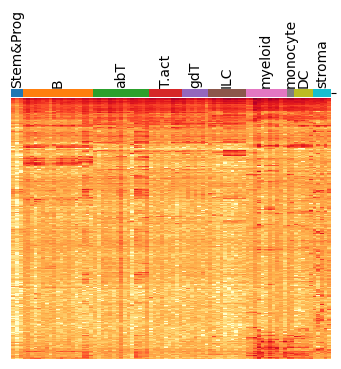

In [18]:
from prep_data_utils import get_lineage_cells

total_counts_path = '/data/nchand/ImmGen/mouse/BPprofiles1000/ImmGenATAC1219.peak_matched_in_sorted.sl10004sh-4.summed_counts.npy'
lineage_filepath='/data/nchand/ImmGen/mouse/immgen_lineages.csv'
cell_names_filepath='/data/nchand/ImmGen/mouse/BPprofiles1000/ImmGenATAC1219.peak_matched_in_sorted.sl10004sh-4.celltypes.npy'

cell_names = np.load(cell_names_filepath)
lineage_names, lineage_cell_indices = get_lineage_cells(lineage_filepath, cell_names=cell_names)

lineage_map = dict(zip(lineage_names, lineage_cell_indices))

n_examples = 1000
total_counts = np.load(total_counts_path)[:n_examples]
print(total_counts.shape)
# Example usage:
# Example data
np.random.seed(42)
n_rows, n_cols = 100, 10
data = total_counts

# First apply the log transformation
pseudocount = 1
log_base = 2
# Log transform the data
log_data = np.log(total_counts + pseudocount) / np.log(log_base)

# Create the plot
g = plot_clustered_heatmap(
    data_matrix=log_data,
    cell_types=cell_names,
    lineage_indices=lineage_map,
    # lineage_colors=lineage_colors,
    figsize=(3.5, 3)
)
plt.savefig('final_figs/count_matrix_log.png', dpi=350, bbox_inches='tight', transparent=True)
plt.show()


In [1]:
plt.savefig('final_figs/count_matrix.png', dpi=350)
# Create the plot
g = plot_clustered_heatmap(
    data_matrix=total_counts,
    cell_types=cell_names,
    lineage_indices=lineage_map,
    # lineage_colors=lineage_colors,
    figsize=(2, 2)
)
plt.show()

NameError: name 'plt' is not defined

### Figure 1c Correlation across peaks scatter plot

We have these correlations already generateb by the `corr_across_peaks.py` script


'/data/nchand/analysis/BPcm_250/BP200_L0_0/peak_corr_testing_corr.npz'  5 trials
'/data/nchand/analysis/BPcm_250/BP203_no_seed_L-1_5/peak_corr_testing_corr.npz'  5 trials

`/data/nchand/analysis/BPcm/BP68_L0_0_extra/peak_corr_testing3_extra.npz` 13 trials
`/data/nchand/analysis/BPcm/BP68_L0_0/peak_corr_testing.npz` bad format
`/data/nchand/analysis/BPcm/BP68_L-1_5_extra/peak_corr_testing3_extra.npz` 18 trials
`/data/nchand/analysis/BPcm/BP68_L-1_5/peak_corr_testing2.npz` idk

Take only the trials where none of the values are zero

In [11]:
import numpy as np
def get_mean_corr_filtered(l0_corr, lp5_corr):
    # Create masks for non-zero rows
    l0_mask = ~(l0_corr == 0).all(axis=1)  # True for rows that have at least one non-zero value
    lp5_mask = ~(lp5_corr == 0).all(axis=1)

    # Apply the masks to get filtered arrays
    l0_corr_filtered = l0_corr[l0_mask]
    lp5_corr_filtered = lp5_corr[lp5_mask]

    print(l0_corr_filtered.shape)
    print(lp5_corr_filtered.shape)

    # there are 6 more trials available of the lp5 than the l0, so I will take the first 8 of both
    lp5_corr_filtered=lp5_corr_filtered[:8]
    print(lp5_corr_filtered.shape)

    # Now I will average over the trials
    l0_mean = np.mean(l0_corr_filtered, axis=0)
    lp5_mean = np.mean(lp5_corr_filtered, axis=0)
    return l0_mean, lp5_mean


In [12]:
def make_drg_txt(peak_names, correlation, output_file):
    with open(output_file, 'w') as f:
        for name, value in zip(peak_names, correlation):
            f.write(f"{name} {value}\n")

In [15]:
from utils.inference_utils import load_names

eval_set = 'test'
peak_names = load_names('/data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/info.txt', eval_set)
l0_corr_file = '/data/nchand/analysis/BPcm_250/BP200_L0_0/peak_corr_testing_corr.npz'
lp5_corr_file = '/data/nchand/analysis/BPcm_250/BP203_no_seed_L-1_5/peak_corr_testing_corr.npz'
x_ocr_pearson_l0_corr = np.load(l0_corr_file)['all_corr_x_ocr']
x_ocr_pearson_lp5_corr = np.load(lp5_corr_file)['all_corr_x_ocr']

x_ocr_spearman_l0_corr = np.load(l0_corr_file)['all_spearman_corr_x_ocr']
x_ocr_spearman_lp5_corr = np.load(lp5_corr_file)['all_spearman_corr_x_ocr']

x_celltype_pearson_l0_corr = np.load(l0_corr_file)['all_corr_x_celltype']
x_celltype_pearson_lp5_corr = np.load(lp5_corr_file)['all_corr_x_celltype']
x_celltype_spearman_l0_corr = np.load(l0_corr_file)['all_spearman_corr_x_celltype']
x_celltype_spearman_lp5_corr = np.load(lp5_corr_file)['all_spearman_corr_x_celltype']


x_ocr_pearson_l0_mean, x_ocr_pearson_lp5_mean = get_mean_corr_filtered(x_ocr_pearson_l0_corr, x_ocr_pearson_lp5_corr)
x_ocr_spearman_l0_mean, x_ocr_spearman_lp5_mean = get_mean_corr_filtered(x_ocr_spearman_l0_corr, x_ocr_spearman_lp5_corr)

x_celltype_pearson_l0_mean, x_celltype_pearson_lp5_mean = get_mean_corr_filtered(x_celltype_pearson_l0_corr, x_celltype_pearson_lp5_corr)
x_celltype_spearman_l0_mean, x_celltype_spearman_lp5_mean = get_mean_corr_filtered(x_celltype_spearman_l0_corr, x_celltype_spearman_lp5_corr)

# combine peak_names and x_celltype_pearson_l0_mean as txt file in the following format:
make_drg_txt(peak_names, x_celltype_pearson_l0_mean, 'final_figs/x_celltype_pearson_l0_mean.txt')
make_drg_txt(peak_names, x_celltype_pearson_lp5_mean, 'final_figs/x_celltype_pearson_lp5_mean.txt')
make_drg_txt(peak_names, x_celltype_spearman_l0_mean, 'final_figs/x_celltype_spearman_l0_mean.txt')
make_drg_txt(peak_names, x_celltype_spearman_lp5_mean, 'final_figs/x_celltype_spearman_lp5_mean.txt')


file name /data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/test.names.dat
shape (32361,)
(5, 90)
(5, 90)
(5, 90)
(5, 90)
(5, 90)
(5, 90)
(5, 32361)
(5, 32361)
(5, 32361)
(5, 32361)
(5, 32361)
(5, 32361)


For the cross celltype datatpoints (where there is data for each OCR) I will use Alex's code

For spearman corr x ocrs

`python scatter_comparison_plot.py ~/MostafaviLab/bpAITAC/final_figs/x_celltype_spearman_l0_mean.txt ~/MostafaviLab/bpAITAC/final_figs/x_celltype_spearman_lp5_mean.txt "AI-TAC" "bpAI-TAC" --savefig ~/MostafaviLab/bpAITAC/final_figs/S1a_spearman_corr_l0_lp5 --plotdiagonal --zeroxaxis --zeroyaxis --contour --density`

In [16]:
d = np.load('/data/nchand/analysis/BPcm/BP68_L0_0_extra/peak_corr_testing3_extra_complete_corr.npz')
d.files

['trial_avg_corr_x_ocr',
 'all_corr_x_celltype',
 'all_corr_x_ocr',
 'all_spearman_corr_x_celltype',
 'all_spearman_corr_x_ocr',
 'trial_avg_spearman_corr_x_ocr']

In [17]:
import matplotlib.pyplot as plt
def scatter_plot_corr_simple(vals1, vals2, namex, namey, outname, dpi=300): 
    plt.clf()
    vals = np.array([vals1, vals2])

    fig = plt.figure(figsize = (3.5,3.5), dpi = dpi)
    ax = fig.add_subplot(111)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    alpha = 0.75
    lw = 0.5
    cmap = None

    # Find the overall min and max
    overall_min = min(np.min(vals1), np.min(vals2))
    overall_max = max(np.max(vals1), np.max(vals2))
        # Add padding to the limits (e.g., 5% of the data range)
    data_range = overall_max - overall_min
    padding = 0.05 * data_range
    plot_min = overall_min - padding
    plot_max = overall_max + padding
    
    # Set both axes to the same padded limits
    ax.set_xlim(plot_min, plot_max)
    ax.set_ylim(plot_min, plot_max)
    
    # Plot diagonal for the full range
    ax.plot([plot_min, plot_max], [plot_min, plot_max], color='maroon')


    a = ax.scatter(vals[0], vals[1], alpha = alpha, vmin = 0, vmax = 1, edgecolor = 'silver', lw = lw)


    ax.set_xlabel(namex)
    ax.set_ylabel(namey)

    print(outname+'_scatter.png')
    fig.savefig(outname+'_scatter.png', dpi = dpi, bbox_inches = 'tight')
    plt.show()


final_figs/1c_corr_x_ocr_l0_vs_lp5_scatter.png


<Figure size 640x480 with 0 Axes>

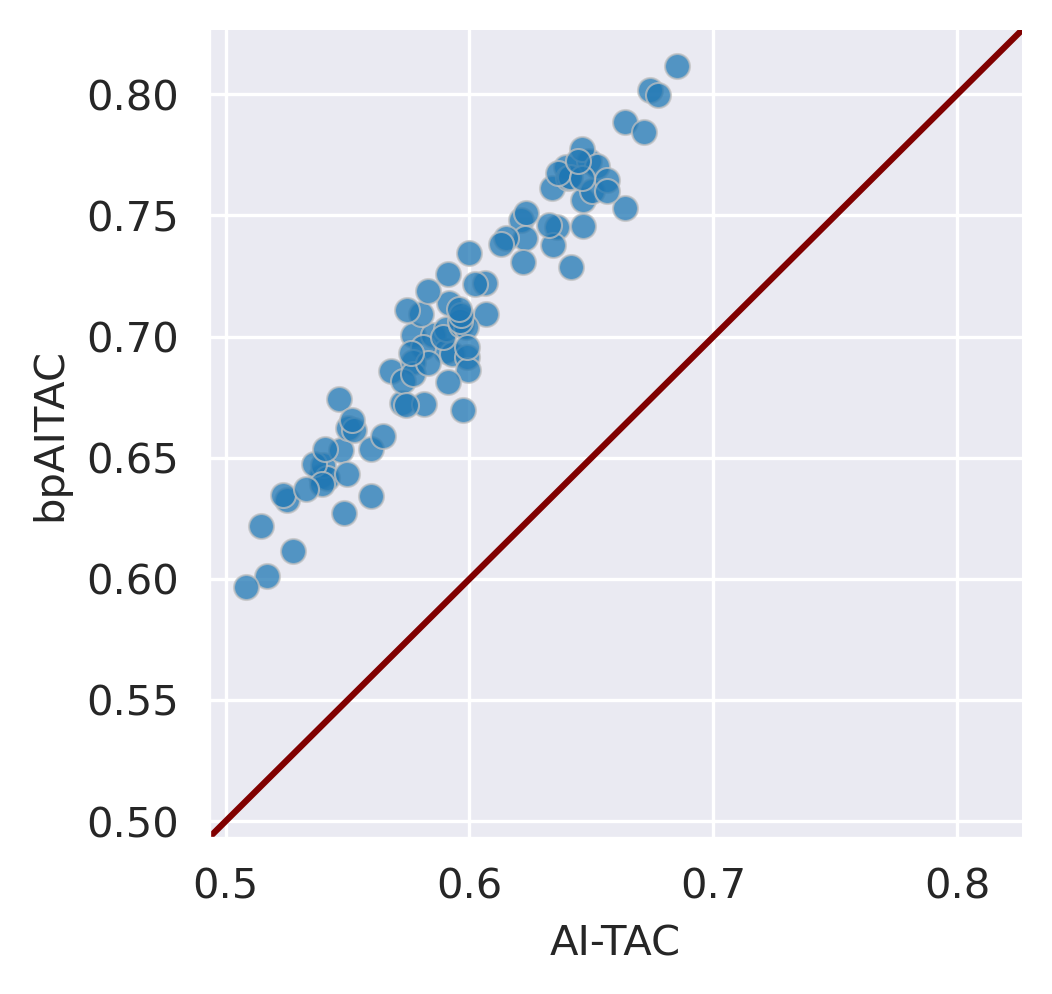

final_figs/S1b_spearman_corr_x_ocr_l0_vs_lp5_scatter.png


<Figure size 640x480 with 0 Axes>

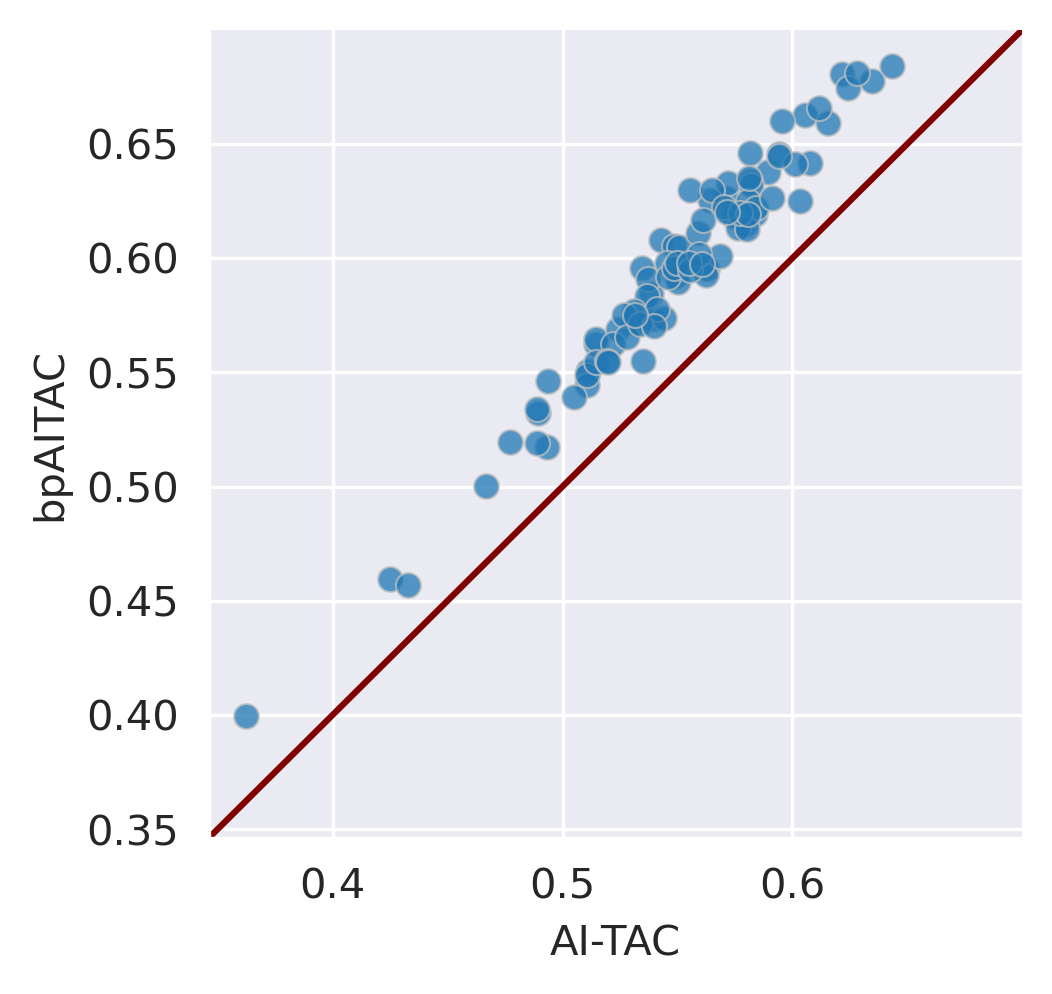

In [22]:
scatter_plot_corr_simple(x_ocr_pearson_l0_mean, x_ocr_pearson_lp5_mean, namex='AI-TAC', namey='bpAITAC', outname='final_figs/1c_corr_x_ocr_l0_vs_lp5')
plt.show()

scatter_plot_corr_simple(x_ocr_spearman_l0_mean, x_ocr_spearman_lp5_mean, namex='AI-TAC', namey='bpAITAC', outname='final_figs/S1b_spearman_corr_x_ocr_l0_vs_lp5')
plt.show()


In [207]:
from load_model import load_model, get_predictions
from utils.inference_utils import load_data
from eval_model import get_model_structure
import os
import numpy as np
def get_scalar_pred_obs(saved_model_path, infofile_path, n_celltypes, saved_file_name='scalar_predictions.npz', model_type='BPcm'):
    """
    returns scalar pred and scalar obs
    """
    n_filters = 300
    get_scalar_prediction = True
    get_profile_prediction = False
    get_scalar_observed = True
    get_profile_observed = False
    eval_set = 'testing'
    bin_size = 1
    model_dir = os.path.dirname(saved_model_path)
    ocr_start = 375
    ocr_end = 625

    model_structure = get_model_structure(model_type, n_filters, n_celltypes)
    model = load_model(saved_model_path, model_structure=model_structure)

    train_loader, val_loader, test_loader = load_data(infofile_path, batch_size=100)

    get_predictions(model, train_loader, val_loader, test_loader, 
                    n_celltypes, 
                    get_scalar_prediction, get_profile_prediction,
                    get_scalar_observed, get_profile_observed,
                    eval_set,
                    bin_size,
                    model_dir,
                    saved_file_name = saved_file_name, 
                    batch_size=100, 
                    save_pred=True,
                    ocr_start=ocr_start, ocr_end=ocr_end,)

    # saved file path
    path = os.path.join(model_dir, saved_file_name)
    data = np.load(path)
    scalar_obs = data['scalar_obs']
    scalar_pred = data['scalar_pred']

    return scalar_pred, scalar_obs


Get results from lambda = 0 model

In [ ]:
lambda_0_model_path = ''
get_scalar_pred_obs()

# Supplementary discussion figures S9

In [41]:
import numpy as np
no_bias_model_corr =  np.load("/homes/gws/nchand/MostafaviLab/results/BPcm_bias0/BP127_L-1_5/complete/12-26-2024.18.38/testing_analysis.npz")['scalar_corr']
bpAITAC_corr =  np.load("/homes/gws/nchand/MostafaviLab/results/BPcm_250/BP126_L-1_5/complete/11-17-2024.11.51/testing_analysis.npz")['scalar_corr']


# get the pearson correlation values
make_drg_txt(peak_names, no_bias_model_corr, 'final_figs/x_celltype_pearson_bias0_BP127.txt')
make_drg_txt(peak_names, bpAITAC_corr, 'final_figs/x_celltype_pearson_bpAITAC250_BP126.txt')

# make a sizes file based on the colorfile
colorfile = ''
with open('/data/nchand/analysis/BPcm/BP68_analysis/testing_lineage_v3/selected_peak_l0_l5_color_file.txt', 'r') as f:
    lines = f.readlines()

with open('/data/nchand/analysis/BPcm/BP68_analysis/testing_lineage_v3/selected_peak_l0_l5_dot_size_file.txt', 'w') as f:
    for line in lines:
        parts = line.strip().split()
        size = "2" if parts[1] == "0" else "20"
        f.write(f"{parts[0]} {size}\n")

# 
# # then turn it into a txt file and send it to Alex's scatter plot
# I need to take the pearson correlation of these 

Call Alex's scatter plot using 
`python scatter_comparison_plot.py ~/MostafaviLab/bpAITAC/final_figs/x_celltype_pearson_bpAITAC250_BP126.txt ~/MostafaviLab/bpAITAC/final_figs/x_celltype_pearson_bias0_BP127.txt "With Bias" "Without Bias" --savefig ~/MostafaviLab/bpAITAC/final_figs/S9_scatter_bias --plotdiagonal --contour --zeroxaxis --zeroyaxis --colorfile /data/nchand/analysis/BPcm/BP68_analysis/testing_lineage_v3/selected_peak_l0_l5_color_file.txt 0 --alpha 0.7 --sizefile /data/nchand/analysis/BPcm/BP68_analysis/testing_lineage_v3/selected_peak_l0_l5_dot_size_file.txt`

In [39]:
no_bias_model['scalar_corr'].shape

(32361,)

In [92]:
# Find some peaks where both no_bias_model_corr and bpAITAC_corr are good 

indices = np.where((no_bias_model_corr > 0.7) & (bpAITAC_corr > 0.7))[0]
print(indices.shape)

with open('/data/nchand/analysis/BPcm/BP68_analysis/testing_lineage_v3/selected_peak_l0_l5_color_file.txt', 'r') as file:
    lines = file.readlines()
    peak_names = [line.split()[0] for line in lines]
    selected_indicator = [float(line.split()[1]) for line in lines]

peak_names= np.array(peak_names)
selected_indicator = np.array(selected_indicator)

print(peak_names)
print(selected_indicator)
print(len(selected_indicator))
indices = np.where((no_bias_model_corr > 0.7) & (bpAITAC_corr > 0.7) & (selected_indicator != 0))[0]
print(len(indices))

print('possible peak names:', peak_names[indices])


(6197,)
['ImmGenATAC1219.peak_185708' 'ImmGenATAC1219.peak_185711'
 'ImmGenATAC1219.peak_185719' ... 'ImmGenATAC1219.peak_95896'
 'ImmGenATAC1219.peak_95897' 'ImmGenATAC1219.peak_95898']
[0. 0. 0. ... 0. 0. 0.]
32361
89
possible peak names: ['ImmGenATAC1219.peak_186667' 'ImmGenATAC1219.peak_187460'
 'ImmGenATAC1219.peak_187506' 'ImmGenATAC1219.peak_188359'
 'ImmGenATAC1219.peak_189839' 'ImmGenATAC1219.peak_189879'
 'ImmGenATAC1219.peak_190187' 'ImmGenATAC1219.peak_190669'
 'ImmGenATAC1219.peak_190910' 'ImmGenATAC1219.peak_191351'
 'ImmGenATAC1219.peak_191736' 'ImmGenATAC1219.peak_192500'
 'ImmGenATAC1219.peak_193507' 'ImmGenATAC1219.peak_194046'
 'ImmGenATAC1219.peak_194826' 'ImmGenATAC1219.peak_195239'
 'ImmGenATAC1219.peak_195431' 'ImmGenATAC1219.peak_195819'
 'ImmGenATAC1219.peak_195921' 'ImmGenATAC1219.peak_196110'
 'ImmGenATAC1219.peak_196300' 'ImmGenATAC1219.peak_196904'
 'ImmGenATAC1219.peak_197674' 'ImmGenATAC1219.peak_198625'
 'ImmGenATAC1219.peak_198646' 'ImmGenATAC1219.peak_

# Figure 3 c

Comparing predictions for specific motifs

### Load the data

In [140]:
from utils.inference_utils import load_observed
from utils.inference_utils import load_names
import numpy as np

info_file = '/data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/info.txt'
peak_names = load_names(info_file, dataset_type='test')
cell_names = np.load("/data/nchand/ImmGen/mouse/BPprofiles1000/ImmGenATAC1219.peak_matched_in_sorted.sl10004sh-4.celltypes.npy")
lineage_filepath = 'immgen_lineages.csv'

test_onehot = load_observed(info_file, dataset_type='test', data_name='onehot')
test_onehot = test_onehot.transpose((0, 2, 1))
test_counts = load_observed(info_file, dataset_type='test', data_name='total_counts')
test_bpcounts = load_observed(info_file, dataset_type='test', data_name='bp_counts')
print(test_counts.shape)

file name /data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/test.names.dat
shape (32361,)
file name /data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/test.onehot.dat
file name /data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/test.total_counts.dat
file name /data/nchand/ImmGen/mouse/BPprofiles1000/memmaped/complete_shallow_deprotinated_bias_quantile_normalized_4.1.25/memmap/test.bp_counts.dat
(32361, 90)


### Set up the models

In [135]:
from eval_model import get_model_structure
from load_model import load_model
from region_identification_utils import get_lineage_cells
from region_identification_utils import get_lineage_counts
from load_model import DEVICE
from modules import AverageWrapper

# Load the models 
aitac_dir = '/data/nchand/analysis/BPcm_250/BP200_L0_0/'
path_aitac = '/data/nchand/analysis/BPcm_250/BP200_L0_0/complete/04-08-2025.15.04/best_model'
bpaitac_dir = '/data/nchand/analysis/BPcm_250/BP203_no_seed_L-1_5/'
path_bpaitac = '/data/nchand/analysis/BPcm_250/BP203_no_seed_L-1_5/complete/04-06-2025.18.35/best_model'

n_celltypes = 90
n_filters = 300
seq_len = 998
model_type = 'BPcm_250'

aitac_structure = get_model_structure(model_type, n_filters, n_celltypes, seq_len=seq_len)
bpaitac_structure = get_model_structure(model_type, n_filters, n_celltypes, seq_len=seq_len)

model_aitac = load_model(path_aitac, model_structure=aitac_structure, n_filters=n_filters, verbose=False)
model_bpaitac = load_model(path_bpaitac, model_structure=bpaitac_structure, n_filters=n_filters, verbose=False)

n_lineages = 10
lineage_names, lineage_cell_indices = get_lineage_cells(lineage_filepath, cell_names=cell_names)
lineage_model_aitac = AverageWrapper(model_aitac, lineage_cell_indices)
lineage_model_bpaitac = AverageWrapper(model_bpaitac, lineage_cell_indices)





199
39
7
199
39
7
DEVICE is cuda:2
998 300 90
DEVICE is cuda:2
998 300 90


/homes/gws/nchand/MostafaviLab/bpAITAC/load_model.py:42: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(saved_model_path))


### find the regions with a the test sequences that have the motifs in them

In [136]:
from tangermeme.io import read_meme

# motifs 

motif_dict = {
    'REL':"GGGAATTTCCC",
    # 'PTF1A':"TTCACACCTG",
    # 'MOTIF_53':"GCAGCGGTATAGTACAGCCC",
    # 'PAX5':"GGAGCACTGAAGCGTAGCCG",
    # 'SPI1':"AAAAAGAGGAAGTG",
    # 'EOMES':"AAGGTGTGAAAA",
    # 'RUNX':"TCTGTGGTTT",
    # 'C_EBP':"CCAAT",
    # 'CTCF':"TGGCCACCAGGGGGCGCTA",
    'RUNX':"CTGTGGTTT",
    'ETV2':"ACCGGAAAT",
    'MOTIF_291':"CAGCTG",
    'ATF3':"GATGACGT",
    'no_motif':""
}

motif_num_dict = { # UPDATED 4/23
    'REL': '732 ',
    'RUNX': '1570 ',
    'ETV2': '1463 ',
    'MOTIF_291':'291 ',
    'MOTIF_540':'540 ',
    'MOTIF_1816':'1816 '
}

motif_pwms = read_meme("final_figs/motif_pwms_4.23.25.meme")

bases = ['A', 'C', 'G', 'T'] # from /data/nchand/mm10/mm10ImmGenATAC1219.peak_matched1000bp_onehot-ACGT_alignleft.npz

In [ ]:
from utils.inference_utils import predict_scalar
import torch

def get_motif_specific_predictions_and_observed(lineage_model1, lineage_model2, motif_name_list, 
                                                motif_hit_idx_dict,
                                                test_onehot, test_counts, 
                                                lineage_cell_indices, n_lineages, count_threshold=0):
    results_dict = {}
    for motif_name in motif_name_list:
        motif_hit_idx = motif_hit_idx_dict[motif_name]
        onehot_with_motif = test_onehot[motif_hit_idx]
        observed_counts_with_motif = test_counts[motif_hit_idx]

        if count_threshold > 0:
            threshold_idx = np.argwhere(np.max(observed_counts_with_motif, axis=1) > count_threshold).flatten()
            print('threshold mask', threshold_idx.shape)
            observed_counts_with_motif = observed_counts_with_motif[threshold_idx]
            onehot_with_motif = onehot_with_motif[threshold_idx]
            print()

        observed_counts_with_motif_lineage = get_lineage_counts(lineage_cell_indices, observed_counts_with_motif) # get the lineage counts
        model_1_preds = predict_scalar(lineage_model1, onehot_with_motif, n_celltypes=n_lineages, device=DEVICE)
        model_2_preds = predict_scalar(lineage_model2, onehot_with_motif, n_celltypes=n_lineages, device=DEVICE)
        
        assert not torch.allclose(model_1_preds, model_2_preds), f"Model 1 and Model 2 predictions are identical: {model_1_preds} and {model_2_preds}"
    
        results_dict[motif_name] = {'aitac_counts': model_1_preds.cpu().numpy(),
                            'bpaitac_counts': model_2_preds.cpu().numpy(),
                            'observed_counts': observed_counts_with_motif_lineage}

    return results_dict

In [141]:
from tangermeme.tools.fimo import fimo
def get_counts_for_multiple_motifs(lineage_model_aitac, lineage_model_bpaitac, motif_name_list,
                                                motif_num_dict, motif_pwms, test_onehot, test_counts, 
                                                lineage_cell_indices, n_lineages, count_threshold, p_threshold=0.0001):
    

    selected_motif_pwms = {key: motif_pwms[key] for key in motif_num_dict.values()}
    threshold=p_threshold
    hits = fimo(selected_motif_pwms, test_onehot, threshold=threshold)

    motif_hit_idx ={}
    for i, motif_name in enumerate(motif_name_list):
        if motif_name == 'all':
            print(motif_name, 'len', len(test_onehot))
            motif_hit_idx[motif_name] = range(len(test_onehot))
        else:
            print(motif_name, 'len', len(hits[i]))
            motif_hit_idx[motif_name] = hits[i]['sequence_name']

    results_dict = get_motif_specific_predictions_and_observed(lineage_model1=lineage_model_aitac, lineage_model2=lineage_model_bpaitac, 
                                                motif_name_list=motif_name_list, motif_hit_idx_dict=motif_hit_idx, test_onehot=test_onehot, test_counts=test_counts, 
                                                lineage_cell_indices=lineage_cell_indices, n_lineages=n_lineages,
                                                count_threshold=count_threshold)
    return results_dict
    

In [142]:
# motif_list = ['REL', 'RUNX', 'ETV2', 'MOTIF_291', 'MOTIF_540', 'MOTIF_1816', 'all']
# motif_list = ['REL', 'RUNX', 'ETV2', 'MOTIF_291', 'all']
motif_list = ['REL', 'RUNX', 'ETV2', 'all']



count_threshold=0
p_threshold=0.00008

pred_observed_motif_dict = get_counts_for_multiple_motifs(lineage_model_aitac, lineage_model_bpaitac, 
                                                          motif_name_list=motif_list, 
                                                          motif_num_dict=motif_num_dict,
                                                          motif_pwms=motif_pwms,
                                                          test_onehot=test_onehot,
                                                          test_counts=test_counts,
                                                          lineage_cell_indices=lineage_cell_indices,
                                                          n_lineages=n_lineages,
                                                          count_threshold=count_threshold,
                                                          p_threshold=p_threshold)


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


REL len 3471
RUNX len 797
ETV2 len 842
all len 32361


100%|████████████████████████████████████████████████████████████████| 324/324 [00:24<00:00, 13.02it/s]


In [143]:
pred_observed_motif_dict['REL']['aitac_counts']
pred_observed_motif_dict['REL']['observed_counts']

array([[  6.17777777,  12.00467777,   3.69481516, ...,   2.9333334 ,
          4.71999979,   8.4533329 ],
       [  4.55555582,   7.71929789,  11.11407375, ...,  85.08889008,
        154.39109802,  25.3599987 ],
       [ 26.02222252,  12.54619884,  46.78222275, ..., 123.17778015,
        327.8444519 , 151.3777771 ],
       ...,
       [  8.23703671,   5.73684263,   5.33925915, ...,  19.14444351,
         11.87111092,  18.04888916],
       [ 64.51851654,   9.79883099,  19.55555534, ...,   9.62222195,
         61.63555908,  30.51555824],
       [ 33.13333511,   9.99882984,   9.12592602, ...,   3.84444427,
         66.44889069,  55.2444458 ]])

### Plot the results for the desired all 10 cell lineages

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def create_stacked_comparison_boxplots(predictions_list, cellnames, motif_names,
                                     figsize=(15, 6), show_outliers=True, show_zero_line=False, predictions_names_list=None):
    """
    Create multiple boxplots stacked vertically comparing predictions between models and observed values.
    
    Parameters:
    -----------
    predictions_list : list of tuples
        List of (preds_model1, preds_model2) tuples for each motif/feature
        or List of (preds_model1, preds_model2, observed) tuples for each motif/feature
    cellnames : list
        List of cell type names
    motif_names : list
        List of motif/feature names
    figsize : tuple, optional
        Base figure size that will be adjusted based on number of plots
    show_outliers : bool, optional
        Whether to show outliers in the boxplots
    show_zero_line : bool, optional
        Whether to display a horizontal dashed line at y=0
        
    Returns:
    --------
    matplotlib.figure.Figure
        The created figure containing all subplots
    """

    
    num_plots = len(predictions_list)
    
    # Adjust figure height based on number of plots
    adjusted_figsize = (figsize[0], figsize[1] * num_plots)
    
    # Create figure and subplots
    fig, axes = plt.subplots(num_plots, 1, figsize=adjusted_figsize)
    if num_plots == 1:
        axes = [axes]
    
    # For each motif/feature
    for idx, (predictions, motif_name, ax) in enumerate(zip(predictions_list, motif_names, axes)):
        data_list = []
        
        # Check if we have observed values (3 elements in the tuple)
        has_observed = len(predictions) == 3
        
        preds_model1 = predictions[0]
        preds_model2 = predictions[1]
        observed = predictions[2] if has_observed else None
        
        # Define model names
        if predictions_names_list is None:
            model_names = ['AI-TAC', 'bpAI-TAC', 'Observed'] if has_observed else ['AI-TAC', 'bpAI-TAC']
        else:
            model_names = predictions_names_list
        model_colors = ['lightblue', 'orange', 'green'] if has_observed else ['lightblue', 'orange']
        
        # For each celltype
        for i in range(len(cellnames)):
            # Add data for model1
            data_list.extend([{
                'Celltype': f'{cellnames[i]}',
                'Model': model_names[0],
                'Prediction': val
            } for val in preds_model1[:, i]])
            
            # Add data for model2
            data_list.extend([{
                'Celltype': f'{cellnames[i]}',
                'Model': model_names[1],
                'Prediction': val
            } for val in preds_model2[:, i]])
            
            # Add observed data if available
            if has_observed:
                data_list.extend([{
                    'Celltype': f'{cellnames[i]}',
                    'Model': model_names[2],
                    'Prediction': val
                } for val in observed[:, i]])
        
        df = pd.DataFrame(data_list)
        print('df', df)
        
        # Create boxplot on current subplot
        sns.boxplot(data=df, x='Celltype', y='Prediction',
                   hue='Model', palette=model_colors,
                   showfliers=show_outliers, ax=ax)
        
        # Add horizontal line at y=0 if requested
        if show_zero_line:
            ax.axhline(y=0, color='black', alpha=0.3)
        
        # Customize the subplot
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
        ax.set_xlabel('Cell Type' if idx == num_plots-1 else '')
        ax.set_ylabel(motif_name)
        
        # Keep legend only for the first plot and adjust its position
        if idx == 0:
            ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
        else:
            ax.get_legend().remove()
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return fig

In [ ]:
pred_observed_motif_dict['REL']['observed_counts']

NameError: name 'pred_observed_motif_dict' is not defined

df         Celltype     Model  Prediction
0      Stem&Prog    AI-TAC   -1.838160
1      Stem&Prog    AI-TAC   13.822477
2      Stem&Prog    AI-TAC  -19.082914
3      Stem&Prog    AI-TAC  -15.786747
4      Stem&Prog    AI-TAC  -14.816648
...          ...       ...         ...
69415     stroma  bpAI-TAC  -13.565491
69416     stroma  bpAI-TAC   -3.311039
69417     stroma  bpAI-TAC    9.108627
69418     stroma  bpAI-TAC    1.972288
69419     stroma  bpAI-TAC  -37.388193

[69420 rows x 3 columns]
df         Celltype     Model  Prediction
0      Stem&Prog    AI-TAC    1.094858
1      Stem&Prog    AI-TAC   -0.689667
2      Stem&Prog    AI-TAC  160.955185
3      Stem&Prog    AI-TAC    0.594007
4      Stem&Prog    AI-TAC    2.806000
...          ...       ...         ...
15935     stroma  bpAI-TAC   89.305771
15936     stroma  bpAI-TAC   -8.579827
15937     stroma  bpAI-TAC    0.116535
15938     stroma  bpAI-TAC   64.240028
15939     stroma  bpAI-TAC   -1.550371

[15940 rows x 3 columns]
df    

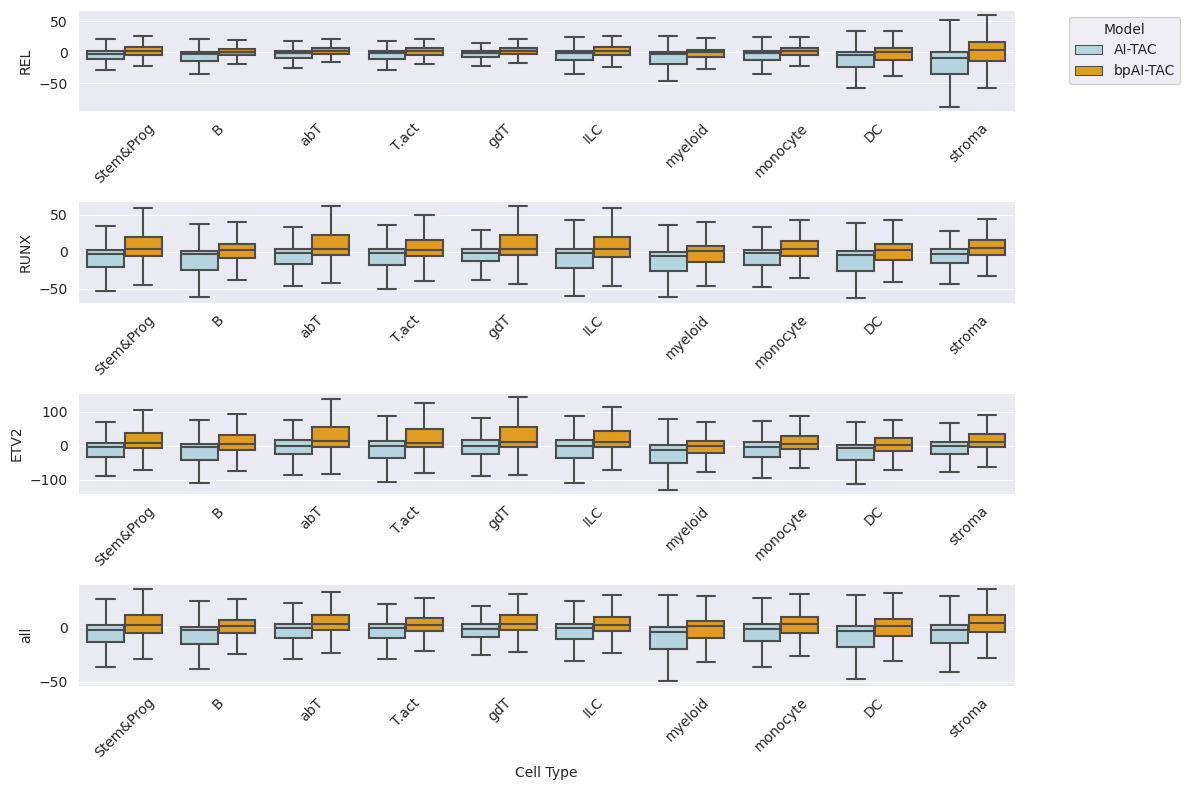

In [ ]:

# Create the predictions list for plotting
# predictions_list = [
#     (p0_diff[motif], p5_diff[motif])
#     for motif in motifs
# ]
# plot_motif_names_list = ['REL', 'RUNX', 'ETV2', 'MOTIF_291', 'all']
plot_motif_names_list = ['REL', 'RUNX', 'ETV2', 'all']


filename_end = '_4.23'

diff_list = [
    (pred_observed_motif_dict[motif]['aitac_counts'] - pred_observed_motif_dict[motif]['observed_counts'], 
     pred_observed_motif_dict[motif]['bpaitac_counts'] - pred_observed_motif_dict[motif]['observed_counts']
    ) for motif in plot_motif_names_list
]

abs_diff_list = [
    (np.abs(pred_observed_motif_dict[motif]['aitac_counts'] - pred_observed_motif_dict[motif]['observed_counts']), 
     np.abs(pred_observed_motif_dict[motif]['bpaitac_counts'] - pred_observed_motif_dict[motif]['observed_counts'])
    ) for motif in plot_motif_names_list
]

predictions_list = [
    (pred_observed_motif_dict[motif]['aitac_counts'], 
     pred_observed_motif_dict[motif]['bpaitac_counts'],
     pred_observed_motif_dict[motif]['observed_counts']) for motif in plot_motif_names_list
]


# Create the plot
fig = create_stacked_comparison_boxplots(
    predictions_list=diff_list,
    cellnames=lineage_names,  # Your list of cell type names
    motif_names=plot_motif_names_list,   # Your list of motif names
    figsize=(12, 2),
    show_outliers=False
)

fig.show()

fig.savefig(f'final_figs/3c_motif_seqs_observed{filename_end}.png', bbox_inches='tight', dpi=330)


Let's try plotting the motifs inserted into shuffled sequences

In [16]:
from tangermeme.ersatz import dinucleotide_shuffle
from tangermeme.utils import one_hot_encode
from tangermeme.ersatz import substitute

seed = 42
np.random.seed(seed)
n_random_samples = 4000 # grab a random 1000 sequences to do analysis with
random_indices = np.random.choice(len(test_onehot), size=n_random_samples, replace=False)
selected_seqs = test_onehot[random_indices]

# move our onehot_sequences to be in the shape expected by tangermeme
selected_onehot_tangermeme_format = torch.from_numpy(selected_seqs)
print('onehot tangermeme format shape', selected_onehot_tangermeme_format.shape)
onehot_shuf = dinucleotide_shuffle(selected_onehot_tangermeme_format, n=1, random_state=seed)
onehot_shuf = torch.squeeze(onehot_shuf)


onehot tangermeme format shape torch.Size([4000, 4, 998])


In [17]:
selected_onehot_tangermeme_format.shape

torch.Size([4000, 4, 998])

In [ ]:
len(test_onehot)

32361

In [18]:
def get_marginalized_predictions(lineage_model1, lineage_model2, onehot_shuf, motif_dict):
    results_dict = {}
    # Generate predictions for each motif
    for motif_name, motif in motif_dict.items():
        print(motif_name, motif)
        if len(motif) == 0:
            model_1_preds = predict_scalar(lineage_model1, onehot_shuf, n_celltypes=n_lineages, device=DEVICE)
            model_2_preds = predict_scalar(lineage_model2, onehot_shuf, n_celltypes=n_lineages, device=DEVICE)
        else:
            onehot_with_motif = substitute(onehot_shuf, motif=motif)
            model_1_preds = predict_scalar(lineage_model1, onehot_with_motif, n_celltypes=n_lineages, device=DEVICE)
            model_2_preds = predict_scalar(lineage_model2, onehot_with_motif, n_celltypes=n_lineages, device=DEVICE)
            
        assert not torch.allclose(model_1_preds, model_2_preds), f"Model 1 and Model 2 predictions are identical: {model_1_preds} and {model_2_preds}"

        results_dict[motif_name] = {'aitac_counts': model_1_preds.cpu().numpy(),
                            'bpaitac_counts': model_2_preds.cpu().numpy(),
                            }
    return results_dict


In [19]:
marginalized_results = get_marginalized_predictions(lineage_model_aitac, lineage_model_bpaitac,onehot_shuf,
                                                    motif_dict)



REL GGGAATTTCCC


100%|██████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.68it/s]


RUNX CTGTGGTTT


100%|██████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.62it/s]


ETV2 ACCGGAAAT


100%|██████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.57it/s]


MOTIF_291 CAGCTG


100%|██████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.59it/s]


ATF3 GATGACGT


100%|██████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.55it/s]


no_motif 


100%|██████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.48it/s]


df         Celltype     Model  Prediction
0      Stem&Prog    AI-TAC   -0.182523
1      Stem&Prog    AI-TAC   -1.014835
2      Stem&Prog    AI-TAC    3.094973
3      Stem&Prog    AI-TAC  -21.384933
4      Stem&Prog    AI-TAC   -1.067722
...          ...       ...         ...
79995     stroma  bpAI-TAC   22.772106
79996     stroma  bpAI-TAC   18.680923
79997     stroma  bpAI-TAC   11.893581
79998     stroma  bpAI-TAC   38.371613
79999     stroma  bpAI-TAC   41.397354

[80000 rows x 3 columns]
df         Celltype     Model  Prediction
0      Stem&Prog    AI-TAC   -0.723370
1      Stem&Prog    AI-TAC    0.215189
2      Stem&Prog    AI-TAC    2.474977
3      Stem&Prog    AI-TAC  -15.625416
4      Stem&Prog    AI-TAC    0.683178
...          ...       ...         ...
79995     stroma  bpAI-TAC   -1.400735
79996     stroma  bpAI-TAC   -0.759106
79997     stroma  bpAI-TAC   -0.683246
79998     stroma  bpAI-TAC  -11.107208
79999     stroma  bpAI-TAC   -6.182798

[80000 rows x 3 columns]
df    

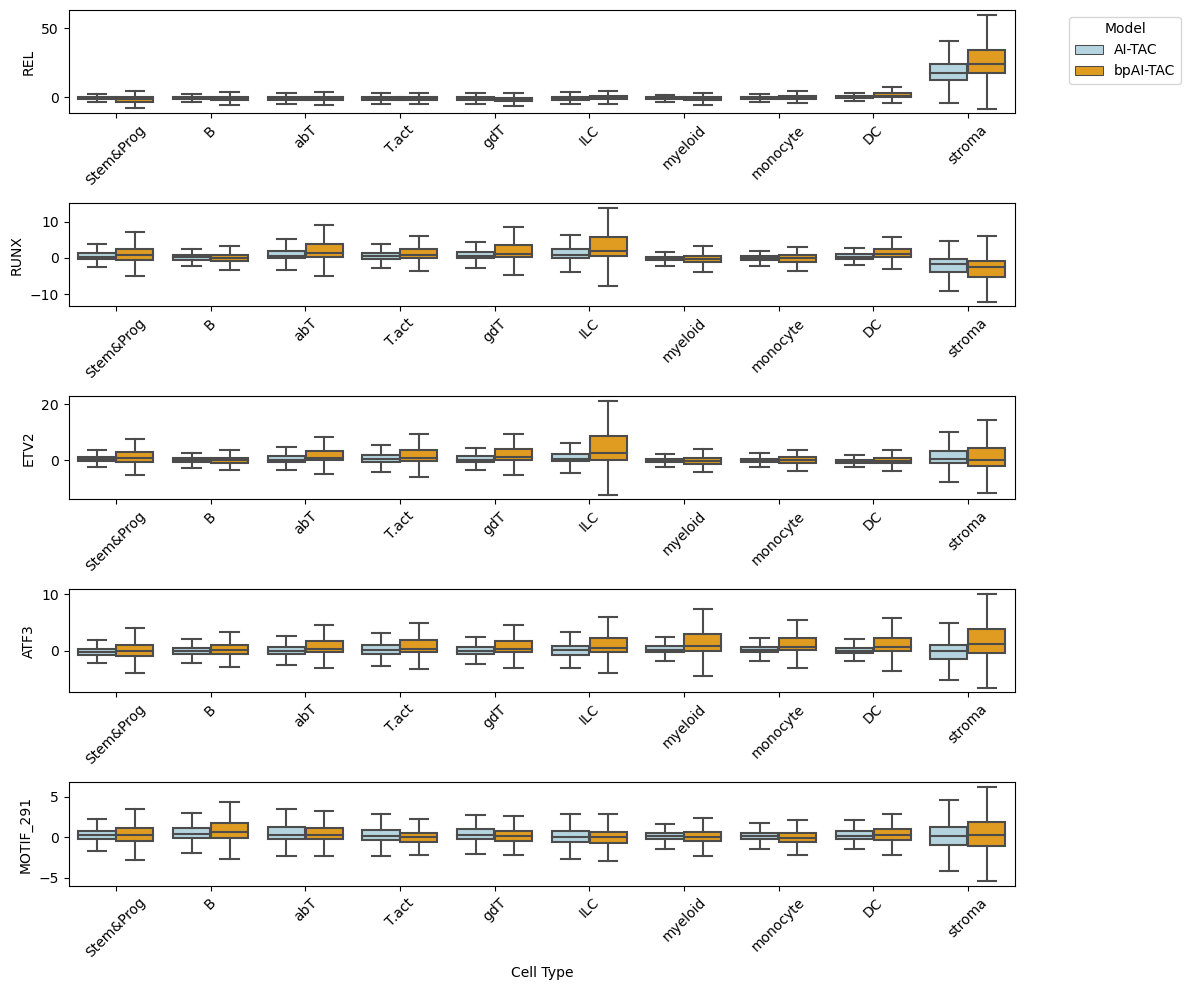

In [65]:
plot_motif_names_list = ['REL', 'ETV2', 'ATF3']
filename_end = ''

predictions_list = [
    (marginalized_results[motif]['aitac_counts'], 
     marginalized_results[motif]['bpaitac_counts'],
    ) for motif in plot_motif_names_list
]

diff_from_random_list = [
    (marginalized_results[motif]['aitac_counts'] - marginalized_results['no_motif']['aitac_counts'], 
     marginalized_results[motif]['bpaitac_counts'] - marginalized_results['no_motif']['bpaitac_counts'],
    ) for motif in plot_motif_names_list
]


# Create the plot
fig = create_stacked_comparison_boxplots(
    predictions_list=diff_from_random_list,
    cellnames=lineage_names,  # Your list of cell type names
    motif_names=plot_motif_names_list,   # Your list of motif names
    figsize=(12, 3.3),
    show_outliers=False
)

fig.show()

fig.savefig(f'final_figs/3c_motif_seqs_diff{filename_end}.png', bbox_inches='tight', dpi=330)


## 3d Marginalized profile figs

1. You have to get the predictions before and after the motif insertion and 
2. then plot that


In [24]:
from utils.inference_utils import predict_all
# You have to get the predictions before and after the motif insertion and then plot that
def get_marginalized_profile_predictions(lineage_model1, lineage_model2, onehot_shuf, motif_dict):
    results_dict = {}
    out_seq_len=250
    # Generate predictions for each motif
    for motif_name, motif in motif_dict.items():
        print(motif_name, motif)
        if len(motif) == 0:
            model_1_profile_pred, _ = predict_all(lineage_model1, onehot_shuf, n_celltypes=n_lineages, device=DEVICE, out_seq_len=out_seq_len)
            model_2_profile_pred, _ = predict_all(lineage_model2, onehot_shuf, n_celltypes=n_lineages, device=DEVICE, out_seq_len=out_seq_len)
        else:
            onehot_with_motif = substitute(onehot_shuf, motif=motif)
            model_1_profile_pred, _  = predict_all(lineage_model1, onehot_with_motif, n_celltypes=n_lineages, device=DEVICE, out_seq_len=out_seq_len)
            model_2_profile_pred, _ = predict_all(lineage_model2, onehot_with_motif, n_celltypes=n_lineages, device=DEVICE, out_seq_len=out_seq_len)
            
        assert not torch.allclose(model_1_profile_pred, model_2_profile_pred), f"Model 1 and Model 2 predictions are identical: {model_1_profile_pred} and {model_2_profile_pred}"

        results_dict[motif_name] = {'aitac_profiles': model_1_profile_pred.cpu().numpy(),
                            'bpaitac_profiles': model_2_profile_pred.cpu().numpy(),
                            }
    return results_dict



In [25]:
from scipy.special import softmax
import numpy as np
import matplotlib.pyplot as plt

def plot_genomic_predictions_comparison(y_before1, y_after1, y_before2, y_after2, 
                                      lineage_names, motif_name, titles=("Plot 1", "Plot 2"), start_idx=375, end_idx=625, 
                                      figsize=(20, 20),
                                      band_type="std",
                                      relative_position_labels=False
                                      ):
    """
    Create two sets of genomic prediction plots side by side with proper scaling.
    Includes standard deviation bands around the mean lines.
    
    Parameters:
    -----------
    y_before1, y_after1 : First set of predictions
    y_before2, y_after2 : Second set of predictions
    lineage_names : list of str
        Names of lineages to use as subplot titles
    start_idx, end_idx : int
        Start and end indices for the genomic window
    figsize : tuple
        Figure size (width, height)
    """
    

    def process_input(x, band_type="std"):  # Added band_type parameter
        """Helper function to process input arrays and calculate bounds"""
        if isinstance(x, torch.Tensor):
            x = x.detach().cpu().numpy()
            
        if not isinstance(x, np.ndarray):
            raise TypeError("Input must be either a PyTorch tensor or NumPy array")
            
        # Calculate mean
        x_mean = x.mean(axis=0)
        
        # Calculate bounds based on band_type
        if band_type == "std":
            x_std = x.std(axis=0)
            x_upper = x_mean + x_std
            x_lower = x_mean - x_std
            return x_mean, x_upper, x_lower
        elif band_type == "quartile":
            x_lower = np.percentile(x, 25, axis=0)
            x_upper = np.percentile(x, 75, axis=0)
            x_median = np.median(x, axis=0)
            return x_median, x_upper, x_lower
        else:
            raise ValueError("band_type must be either 'std' or 'quartile'")
            

    # Process all inputs
    yb1_mean, yb1_upper, yb1_lower = process_input(y_before1, band_type)
    ya1_mean, ya1_upper, ya1_lower = process_input(y_after1, band_type)
    yb2_mean, yb2_upper, yb2_lower = process_input(y_before2, band_type)
    ya2_mean, ya2_upper, ya2_lower = process_input(y_after2, band_type)
    
    print('yb mean, and yb upper', yb1_mean.shape, yb1_upper.shape)
    
    # Create figure and grid
    fig, axes = plt.subplots(len(lineage_names), 2, figsize=figsize)
        
    # Find global min/max for consistent scaling
    all_data = np.concatenate([
        yb1_mean[:, start_idx:end_idx].flatten(),
        ya1_mean[:, start_idx:end_idx].flatten(),
        yb2_mean[:, start_idx:end_idx].flatten(),
        ya2_mean[:, start_idx:end_idx].flatten(),
        yb1_upper[:, start_idx:end_idx].flatten(),
        yb1_lower[:, start_idx:end_idx].flatten(),
        ya1_upper[:, start_idx:end_idx].flatten(),
        ya1_lower[:, start_idx:end_idx].flatten(),
        yb2_upper[:, start_idx:end_idx].flatten(),
        yb2_lower[:, start_idx:end_idx].flatten(),
        ya2_upper[:, start_idx:end_idx].flatten(),
        ya2_lower[:, start_idx:end_idx].flatten()
    ])
    
    print(all_data)
    global_min = np.min(all_data)
    global_max = np.max(all_data)
    
    # Add small padding to min/max
    padding = (global_max - global_min) * 0.05
    y_min = global_min - padding
    y_max = global_max + padding
    
    # Create x-axis values
    x_values = np.arange(start_idx, end_idx)
    band_label = "±1 std dev" if band_type == "std" else "quartile band"

    # Plot each row
    for i, lineage in enumerate(lineage_names):
        # Left plot
        # Plot std deviation bands
        axes[i, 0].fill_between(x_values, 
                              yb1_lower[i, start_idx:end_idx],
                              yb1_upper[i, start_idx:end_idx],
                              color='b', alpha=0.2)
        axes[i, 0].fill_between(x_values,
                              ya1_lower[i, start_idx:end_idx],
                              ya1_upper[i, start_idx:end_idx],
                              color='r', alpha=0.2)
        
        # Plot mean lines
        axes[i, 0].plot(x_values, yb1_mean[i, start_idx:end_idx], color='b', 
                       linewidth=1, label=f"no {motif_name}")
        axes[i, 0].plot(x_values, ya1_mean[i, start_idx:end_idx], color='r',
                       linewidth=1, label=f"{motif_name}")
        
        axes[i, 0].set_ylim(y_min, y_max)
        axes[i, 0].set_ylabel(f"{lineage}\n")
        axes[i, 0].grid(True, linestyle='--', alpha=0.7)
        if i == 0:
            axes[i, 0].set_title(titles[0])
        
        # Right plot
        # Plot std deviation bands
        axes[i, 1].fill_between(x_values,
                              yb2_lower[i, start_idx:end_idx],
                              yb2_upper[i, start_idx:end_idx],
                              color='b', alpha=0.2)
        axes[i, 1].fill_between(x_values,
                              ya2_lower[i, start_idx:end_idx],
                              ya2_upper[i, start_idx:end_idx],
                              color='r', alpha=0.2)
        
        # Plot mean lines
        axes[i, 1].plot(x_values, yb2_mean[i, start_idx:end_idx], color='b',
                       linewidth=1, label=f"no {motif_name}")
        axes[i, 1].plot(x_values, ya2_mean[i, start_idx:end_idx], color='r',
                       linewidth=1, label=f"{motif_name}")
        
        axes[i, 1].set_ylim(y_min, y_max)
        axes[i, 1].grid(True, linestyle='--', alpha=0.7)
        if i == 0:
            axes[i, 1].set_title(titles[1])
        
        # Add legend to first row only
        if i == 0 and motif_name is not None:
            axes[i, 0].legend(fontsize=8)
            axes[i, 1].legend(fontsize=8)
        # Hide x-axis labels except for bottom plots
        if i != len(lineage_names) - 1:
            axes[i, 0].set_xticklabels([])
            axes[i, 1].set_xticklabels([])
        elif relative_position_labels:  
            #convert the labels which are from 50 to 200 right now, to where the center is 0 and then everythin is relative to that (negative or positive)
            current_ticks = axes[i, 0].get_xticks()
            center = (current_ticks.max() + current_ticks.min()) / 2
            relative_ticks = current_ticks - center
            axes[i, 0].set_xticklabels(relative_ticks)
            axes[i, 1].set_xticklabels(relative_ticks)
    

    # Add x-label to bottom row only
    if relative_position_labels:
        axes[-1, 0].set_xlabel("Relative Genomic Position")
        axes[-1, 1].set_xlabel("Relative Genomic Position")
    else:
        axes[-1, 0].set_xlabel("Genomic Position")
        axes[-1, 1].set_xlabel("Genomic Position")
    
    # Adjust layout
    # plt.subplots_adjust(hspace=0.3, wspace=0.3)
    plt.tight_layout()
    return fig, axes

In [26]:
marginalized_profile_results = get_marginalized_profile_predictions(lineage_model_aitac, lineage_model_bpaitac,onehot_shuf,
                                                    motif_dict)




REL GGGAATTTCCC


100%|██████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.58it/s]


RUNX CTGTGGTTT


100%|██████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.53it/s]


ETV2 ACCGGAAAT


100%|██████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.50it/s]


MOTIF_291 CAGCTG


100%|██████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.45it/s]


ATF3 GATGACGT


100%|██████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.40it/s]


no_motif 


100%|██████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.33it/s]


In [133]:
pred_observed_motif_dict

NameError: name 'pred_observed_motif_dict' is not defined

pre repeat (4000, 1, 250)
y_after1 (4000, 3, 250)
y_before1 (4000, 3, 250)


yb mean, and yb upper (3, 250) (3, 250)
[0.00215073 0.00220015 0.0021735  ... 0.00134486 0.00130989 0.00133054]


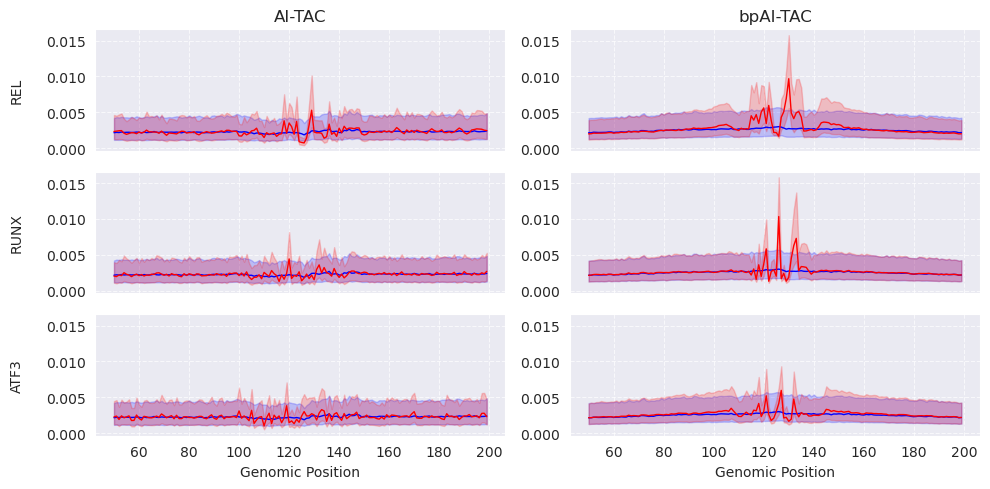

In [132]:
def plot_motif(motif_to_plot):
    y_before1=marginalized_profile_results['no_motif']['aitac_profiles']
    y_after1=marginalized_profile_results[motif_to_plot]['aitac_profiles']
    y_before2=marginalized_profile_results['no_motif']['bpaitac_profiles']
    y_after2=marginalized_profile_results[motif_to_plot]['bpaitac_profiles']

    plot_genomic_predictions_comparison(y_before1, y_after1, y_before2, y_after2, 
                                        lineage_names=lineage_names, motif_name=motif_to_plot, titles=("AI-TAC", "bpAI-TAC"), start_idx=0, end_idx=250, 
                                        figsize=(20, 20),
                                        band_type="quartile",
                                        relative_position_labels=False
                                        )
    
def plot_multiple_motifs(motifs_to_plot, cell_idx, n_sequences, seq_len=250):
    y_before1=marginalized_profile_results['no_motif']['aitac_profiles'][:, cell_idx:cell_idx+1, :]
    print('pre repeat', y_before1.shape)
    y_before1=np.repeat(y_before1, len(motifs_to_plot), axis=1)

    y_before2=marginalized_profile_results['no_motif']['bpaitac_profiles'][:, cell_idx:cell_idx+1, :]
    y_before2=np.repeat(y_before2, len(motifs_to_plot), axis=1)
    
    aitac_different_motif_array = np.zeros((n_sequences, len(motifs_to_plot), seq_len))
    bpaitac_different_motif_array = np.zeros((n_sequences, len(motifs_to_plot), seq_len))
    for i, motif in enumerate(motifs_to_plot):
        aitac_different_motif_array[:, i, :] = marginalized_profile_results[motif]['aitac_profiles'][:, cell_idx, :]
        bpaitac_different_motif_array[:, i, :] = marginalized_profile_results[motif]['bpaitac_profiles'][:, cell_idx, :]
    
    y_after1=aitac_different_motif_array
    y_after2=bpaitac_different_motif_array
    
    print('y_after1', y_after1.shape)
    print('y_before1', y_before1.shape)
    fig, axes = plot_genomic_predictions_comparison(y_before1, y_after1, y_before2, y_after2, 
                                        lineage_names=motifs_to_plot, motif_name=None, titles=("AI-TAC", "bpAI-TAC"), start_idx=50, end_idx=200, 
                                        figsize=(10, 5),
                                        band_type="quartile",
                                        relative_position_labels=False
                                        )
    return fig, axes

cell_idx = 9 # where(lineage_names == 'stroma')
motifs_for_marginalization_plot = ["REL", "RUNX", "ATF3"]
fig, axes = plot_multiple_motifs(motifs_for_marginalization_plot, cell_idx, n_sequences=4000, seq_len=250)
fig.savefig('final_figs/3d_footprints_zoom.png', dpi=330)


# plot_motif("REL")
# plot_motif("MOTIF_291")

### Let's try plotting the difference instead of the raw counts

/tmp/ipykernel_207110/4252552240.py:4: RuntimeWarning: divide by zero encountered in log
  pred_observed_motif_dict[motif]['aitac_log_difference'] = np.log(pred_observed_motif_dict[motif]['observed_counts']) - np.log(pred_observed_motif_dict[motif]['aitac_counts'])
/tmp/ipykernel_207110/4252552240.py:5: RuntimeWarning: divide by zero encountered in log
  pred_observed_motif_dict[motif]['bpaitac_log_difference'] = np.log(pred_observed_motif_dict[motif]['observed_counts']) - np.log(pred_observed_motif_dict[motif]['bpaitac_counts'])
/tmp/ipykernel_207110/1549616622.py:104: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_207110/1549616622.py:104: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()
/tmp/ipykernel_207110/1549616622.py:104: UserWarning: Tight layout not applied. tight_la

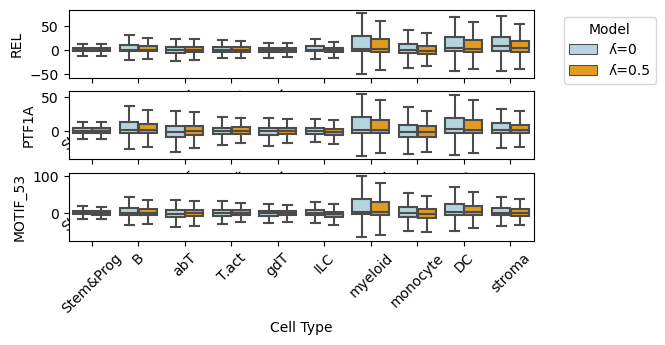

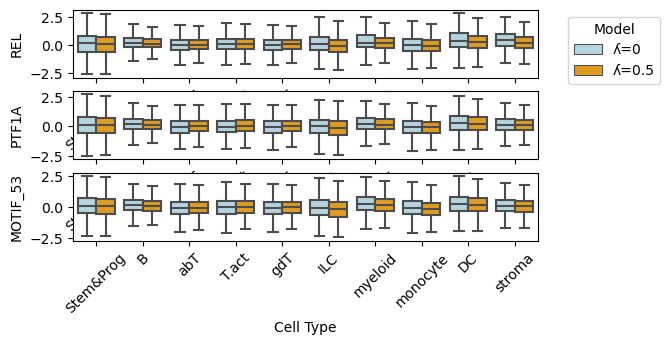

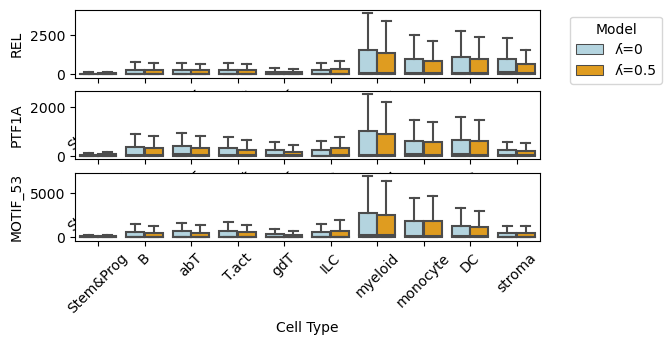

In [ ]:
for motif in pred_observed_motif_dict.keys():
    pred_observed_motif_dict[motif]['aitac_difference'] = pred_observed_motif_dict[motif]['observed_counts'] - pred_observed_motif_dict[motif]['aitac_counts']
    pred_observed_motif_dict[motif]['bpaitac_difference'] = pred_observed_motif_dict[motif]['observed_counts'] - pred_observed_motif_dict[motif]['bpaitac_counts']
    pred_observed_motif_dict[motif]['aitac_log_difference'] = np.log(pred_observed_motif_dict[motif]['observed_counts']) - np.log(pred_observed_motif_dict[motif]['aitac_counts'])
    pred_observed_motif_dict[motif]['bpaitac_log_difference'] = np.log(pred_observed_motif_dict[motif]['observed_counts']) - np.log(pred_observed_motif_dict[motif]['bpaitac_counts'])
    pred_observed_motif_dict[motif]['aitac_error_squared'] = np.square(pred_observed_motif_dict[motif]['observed_counts'] - pred_observed_motif_dict[motif]['aitac_counts'])
    pred_observed_motif_dict[motif]['bpaitac_error_squared'] = np.square(pred_observed_motif_dict[motif]['observed_counts'] - pred_observed_motif_dict[motif]['bpaitac_counts'])
    pred_observed_motif_dict[motif]['aitac_log_error_squared'] = np.log(pred_observed_motif_dict[motif]['aitac_error_squared'])
    pred_observed_motif_dict[motif]['bpaitac_log_error_squared'] = np.log(pred_observed_motif_dict[motif]['bpaitac_error_squared'])

difference_predictions_list = [
    (pred_observed_motif_dict[motif]['aitac_difference'], 
     pred_observed_motif_dict[motif]['bpaitac_difference']) for motif in plot_motif_names_list
]

log_difference_predictions_list = [
    (pred_observed_motif_dict[motif]['aitac_log_difference'], 
     pred_observed_motif_dict[motif]['bpaitac_log_difference']) for motif in plot_motif_names_list
]

error_square_predictions_list = [
    (pred_observed_motif_dict[motif]['aitac_error_squared'], 
     pred_observed_motif_dict[motif]['bpaitac_error_squared']) for motif in plot_motif_names_list
]
log_error_squre_predictions_list = [
    (pred_observed_motif_dict[motif]['aitac_log_error_squared'], 
     pred_observed_motif_dict[motif]['bpaitac_log_error_squared']) for motif in plot_motif_names_list
]


# Create the plot
fig = create_stacked_comparison_boxplots(
    predictions_list=difference_predictions_list,
    cellnames=lineage_names,  # Your list of cell type names
    motif_names=plot_motif_names_list,   # Your list of motif names
    figsize=(6, 1),
    show_outliers=False,
    show_zero_line=False,
)

fig.show()
fig.savefig(f'final_figs/3c_motif_seqs_diff{filename_end}.png', bbox_inches='tight', dpi=330)

# Create the plot
fig = create_stacked_comparison_boxplots(
    predictions_list=log_difference_predictions_list,
    cellnames=lineage_names,  # Your list of cell type names
    motif_names=plot_motif_names_list,   # Your list of motif names
    figsize=(6, 1),
    show_outliers=False,
    show_zero_line=False,
)

fig.show()
fig.savefig(f'final_figs/3c_motif_seqs_log_diff{filename_end}.png', bbox_inches='tight', dpi=330)

# Create the plot
fig = create_stacked_comparison_boxplots(
    predictions_list=error_square_predictions_list,
    cellnames=lineage_names,  # Your list of cell type names
    motif_names=plot_motif_names_list,   # Your list of motif names
    figsize=(6, 1),
    show_outliers=False,
    show_zero_line=False,
)

fig.show()
fig.savefig(f'final_figs/3c_motif_seqs_error2{filename_end}.png', bbox_inches='tight', dpi=330)




IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

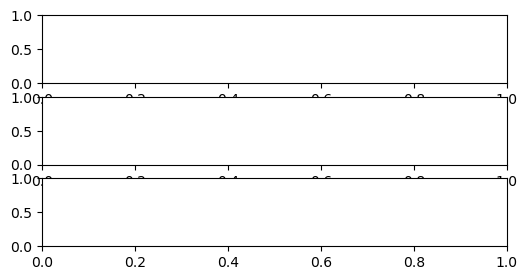

In [ ]:
from functions import pearson_corr
for motif in pred_observed_motif_dict.keys():
    # Convert arrays to torch tensors before calculating correlations
    observed_tensor = torch.tensor(pred_observed_motif_dict[motif]['observed_counts'])
    aitac_tensor = torch.tensor(pred_observed_motif_dict[motif]['aitac_counts'])
    bpaitac_tensor = torch.tensor(pred_observed_motif_dict[motif]['bpaitac_counts'])
    
    # Calculate correlations and convert results back to numpy arrays
    pred_observed_motif_dict[motif]['aitac_corr_x_celltypes'] = pearson_corr(observed_tensor, aitac_tensor, dim=1).cpu().numpy()
    pred_observed_motif_dict[motif]['bpaitac_corr_x_celltypes'] = pearson_corr(observed_tensor, bpaitac_tensor, dim=1).cpu().numpy()
    pred_observed_motif_dict[motif]['aitac_corr_x_peaks'] = pearson_corr(observed_tensor, aitac_tensor, dim=0).cpu().numpy()
    pred_observed_motif_dict[motif]['bpaitac_corr_x_peaks'] = pearson_corr(observed_tensor, bpaitac_tensor, dim=0).cpu().numpy()

celltype_corr_predictions_list = [
    (pred_observed_motif_dict[motif]['aitac_corr_x_celltypes'], 
     pred_observed_motif_dict[motif]['bpaitac_corr_x_celltypes']) for motif in plot_motif_names_list
]

fig = create_stacked_comparison_boxplots(
    predictions_list=celltype_corr_predictions_list,
    cellnames=['Pearson corr accross cells'],  # Your list of cell type names
    motif_names=plot_motif_names_list,   # Your list of motif names
    figsize=(6, 1),
    show_outliers=False,
    show_zero_line=False,
)

fig.show()



check bias

In [ ]:
q_norm_counts = np.sum(test_bpcounts[:,:, 375:625], axis=-1)

In [ ]:
q_norm_counts.shape

(32361, 90)

In [ ]:
q_norm_counts_lineage = get_lineage_counts(lineage_cell_indices, q_norm_counts)

In [ ]:
q_norm_counts_lineage.shape

(32361, 10)

(32361, 10)


IndexError: index 10 is out of bounds for axis 1 with size 10

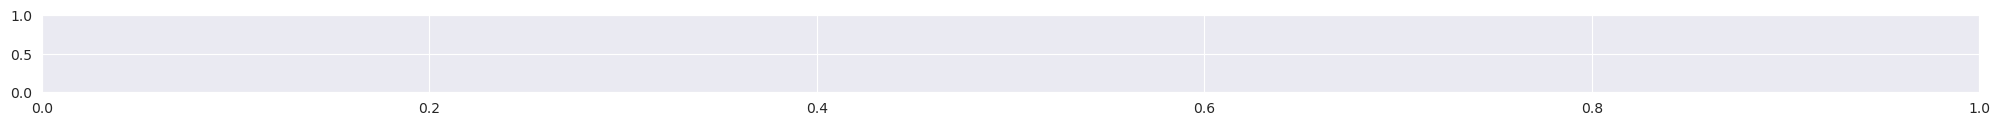

In [ ]:
import matplotlib.pyplot as plt

total_counts_nonnorm = pred_observed_motif_dict['all']['observed_counts']
print(total_counts_nonnorm.shape)




# fig = create_stacked_comparison_boxplots(
#     predictions_list=[(total_counts_nonnorm, q_norm_counts_lineage)],
#     cellnames=lineage_names,  # Your list of cell type names
#     motif_names=['all'],   # Your list of motif names
#     figsize=(6, 1),
#     show_outliers=False,
#     show_zero_line=False,
#     predictions_names_list=['raw', 'bp_summed']
# )

# fig.show()



# fig = create_stacked_comparison_boxplots(
#     predictions_list=[(test_counts, q_norm_counts,quantile_norm_cm)],
#     cellnames=cell_names,  # Your list of cell type names
#     motif_names=['all'],   # Your list of motif names
#     figsize=(20, 1),
#     show_outliers=False,
#     show_zero_line=False,
#     predictions_names_list=['raw', 'bp_summed',  'quantile_cm']
# )

# fig.show()

fig = create_stacked_comparison_boxplots(
    predictions_list=[(total_counts_nonnorm, test_counts)],
    cellnames=cell_names,  # Your list of cell type names
    motif_names=['all'],   # Your list of motif names
    figsize=(25, 1),
    show_outliers=False,
    show_zero_line=False,
    predictions_names_list=['total_counts_nonnorm', 'observed_counts']
)

fig.show()

In [ ]:
quantile_norm_cm.shape

(327927, 90)